In [1]:
import pandas as pd
import numpy as np

# Pour éviter d'avoir les messages warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import des données des dataframes
df1=pd.read_csv('../data/world-happiness-report.csv')
df2_full=pd.read_csv('../data/world-happiness-report-2021.csv')
display(df1.head(1))
display(df2_full.head(1))

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.37,0.451,50.8,0.718,0.168,0.882,0.518,0.258


,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.78,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253


In [3]:
# Harmonisation par suppression des colonnes n'existant que dans le rapport 2021.
df2=df2_full.drop(['Regional indicator','Standard error of ladder score','upperwhisker',
                   'lowerwhisker','Ladder score in Dystopia','Explained by: Log GDP per capita',
                   'Explained by: Social support','Explained by: Healthy life expectancy',
                   'Explained by: Freedom to make life choices','Explained by: Generosity',
                   'Explained by: Perceptions of corruption','Dystopia + residual'],axis=1)

# Ajout de la colonne "year" sur le df2021 pour pouvoir le concatener avec le df1
df2.insert(loc=1,column='year',value=2021)


In [4]:
df2_world = df2.rename({'Afghanistan':'AFG', 'Albania':'ALB','Algeria':'DZA','American Samoa':'ASM','Andorra':'AND','Angola':'AGO','Anguilla'
:'AIA','Antigua and Barbuda':'ATG','Argentina':'ARG','Armenia':'ARM','Aruba':'ABW','Australia':'AUS','Austria':
'AUT','Azerbaijan':'AZE',"The Bahamas":'BHM','Bahrain':'BHR','Bangladesh':'BGD','Barbados':'BRB','Belarus':'BLR',
'Belgium':'BEL','Belize':'BLZ','Benin':'BEN','Bermuda':'BMU','Bhutan':'BTN','Bolivia':'BOL',
'Bosnia and Herzegovina':'BIH','Botswana':'BWA','Brazil':'BRA','British Virgin Islands':'VGB','Brunei':'BRN',
'Bulgaria':'BGR','Burkina Faso':'BFA','Burma':'MMR','Burundi':'BDI','Cabo Verde':'CPV','Cambodia':'KHM',
'Cameroon':'CMR','Canada':'CAN','Cayman Islands':'CYM','Central African Republic':'CAF','Chad':'TCD',
'Chile':'CHL','China':'CHN','Colombia':'COL','Comoros':'COM',"Congo, Democratic Republic of the":'COD',
"Congo (Brazzaville)":'COG','Cook Islands':'COK','Costa Rica':'CRI',"Ivory Coast":'CIV','Croatia':'HRV','Cuba':'CUB','Curacao':'CUW',
'Cyprus':'CYP','Czech Republic':'CZE','Denmark':'DNK','Djibouti':'DJI','Dominica':'DMA','Dominican Republic':'DOM',
'Ecuador':'ECU','Egypt':'EGY','El Salvador':'SLV','Equatorial Guinea':'GNQ','Eritrea':'ERI','Estonia':'EST',
'Ethiopia':'ETH','Falkland Islands (Islas Malvinas)':'FLK','Faroe Islands':'FRO','Fiji':'FJI','Finland':'FIN',
'France':'FRA','French Polynesia':'PYF','Gabon':'GAB',"Gambia, The":'GMB','Georgia':'GEO','Germany':'DEU','Ghana,':'GHA','Gibraltar':'GIB',
'Greece':'GRC','Greenland':'GRL','Grenada':'GRD','Guam':'GUM','Guatemala':'GTM','Guernsey':'GGY','Guinea-Bissau':'GNB',
'Guinea':'GIN','Guyana':'GUY','Haiti':'HTI','Honduras':'HND','Hong Kong S.A.R. of China':'HKG','Hungary':'HUN',
'Iceland':'ISL','India':'IND','Indonesia':'IDN','Iran':'IRN','Iraq':'IRQ','Ireland':'IRL','Isle of Man':'IMN',
'Israel':'ISR','Italy':'ITA','Jamaica':'JAM','Japan':'JPN','Jersey':'JEY','Jordan':'JOR','Kazakhstan':'KAZ',
'Kenya':'KEN','Kiribati':'KIR',"Korea, North":'PRK',"Korea, South":'KOR','Kosovo':'KSV','Kuwait':'KWT',
'Kyrgyzstan':'KGZ','Laos':'LAO','Latvia':'LVA','Lebanon':'LBN','Lesotho':'LSO','Liberia':'LBR','Libya':'LBY',
'Liechtenstein':'LIE','Lithuania':'LTU','Luxembourg':'LUX','Macau':'MAC','North Macedonia':'MKD','Madagascar':'MDG',
'Malawi':'MWI','Malaysia':'MYS','Maldives':'MDV','Mali':'MLI','Malta':'MLT','Marshall Islands':'MHL','Mauritania':'MRT',
'Mauritius':'MUS','Mexico':'MEX',"Micronesia, Federated States of":'FSM','Moldova':'MDA','Monaco':'MCO',
'Mongolia':'MNG','Montenegro':'MNE','Morocco':'MAR','Mozambique':'MOZ','Namibia':'NAM','Nepal':'NPL',
'Netherlands':'NLD','New Caledonia':'NCL','New Zealand':'NZL','Nicaragua':'NIC','Nigeria':'NGA','Niger':'NER',
'Niue':'NIU','Northern Mariana Islands':'MNP','Norway':'NOR','Oman':'OMN','Pakistan':'PAK','Palau':'PLW',
'Panama':'PAN','Papua New Guinea':'PNG','Paraguay':'PRY','Peru':'PER','Philippines':'PHL','Poland':'POL',
'Portugal':'PRT','Puerto Rico':'PRI','Qatar':'QAT','Romania':'ROU','Russia':'RUS','Rwanda,':'RWA',
'Saint Kitts and Nevis':'KNA','Saint Lucia':'LCA','Saint Martin':'MAF','Saint Pierre and Miquelon':'SPM',
'Saint Vincent and the Grenadines':'VCT','Samoa':'WSM','San Marino':'SMR','Sao Tome and Principe':'STP',
'Saudi Arabia':'SAU','Senegal':'SEN','Serbia':'SRB','Seychelles':'SYC','Sierra Leone':'SLE','Singapore':'SGP',
'Sint Maarten,':'SXM','Slovakia':'SVK','Slovenia':'SVN','Solomon Islands':'SLB','Somalia':'SOM','South Africa':'ZAF',
'South Sudan':'SSD','Spain':'ESP','Sri Lanka':'LKA','Sudan':'SDN','Suriname':'SUR','Swaziland':'SWZ',
'Sweden':'SWE','Switzerland':'CHE','Syria':'SYR','Taiwan Province of China':'TWN','Tajikistan':'TJK',
'Tanzania':'TZA','Thailand':'THA','Timor-Leste':'TLS','Togo':'TGO','Tonga':'TON','Trinidad and Tobago':'TTO',
'Tunisia':'TUN','Turkey':'TUR','Turkmenistan':'TKM','Tuvalu':'TUV','Uganda':'UGA','Ukraine':'UKR',
'United Arab Emirates':'ARE','United Kingdom':'GBR','United States':'USA','Uruguay':'URY','Uzbekistan':'UZB',
'Vanuatu':'VUT','Venezuela':'VEN','Vietnam':'VNM','Virgin Islands':'VGB','West Bank':'WBG','Yemen':'YEM',
'Zambia':'ZMB','Zimbabwe':'ZWE'}, axis = 0)

In [5]:
# Renommage des colonnes du df2021 pour la carte: 

df2_world=df2_world.rename(columns={'Ladder score':'lifeExp','Logged GDP per capita':'Log GDP per capita','Country name':
                        'country','Healthy life expectancy':'Healthy life expectancy at birth'})

In [9]:

import plotly.express as px


fig = px.choropleth(df2_world, locations="country",
                    color="lifeExp", # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    title ='Life Ladder by Country',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()




In [10]:
# Renommage des colonnes du df2021
df2=df2.rename(columns={'Ladder score':'Life Ladder','Logged GDP per capita':'Log GDP per capita',
                        'Healthy life expectancy':'Healthy life expectancy at birth'})

# Réindexation du df2021 par rapport au df1
df2.index=df2.index+1950
df2.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
3900,Finland,2021,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
3901,Denmark,2021,7.620,10.933,0.954,72.7,0.946,0.030,0.179
3902,Switzerland,2021,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3903,Iceland,2021,7.554,10.878,0.983,73.0,0.955,0.160,0.673
3904,Netherlands,2021,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [11]:
# Concaténation des deux jeux de données en un trosième jeu global.
df_global=pd.concat([df1,df2],axis=0)
df_global

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.800,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.200,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.600,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.920,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.240,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
4044,Lesotho,2021,3.512,7.926,0.787,48.700,0.715,-0.131,0.915,NaN,NaN
4045,Botswana,2021,3.467,9.782,0.784,59.269,0.824,-0.246,0.801,NaN,NaN
4046,Rwanda,2021,3.415,7.676,0.552,61.400,0.897,0.061,0.167,NaN,NaN
4047,Zimbabwe,2021,3.145,7.943,0.750,56.201,0.677,-0.047,0.821,NaN,NaN


In [12]:
# Ajout de la colonne "Regional Indicator" pour indexer rattacher les pays à leur continent respectif indiqué dans le df2021.
# Apurement du df2021 pour ne conserver que les noms de pays et de continent.
df_continents=df2_full[['Country name','Regional indicator']]

In [13]:
# Fusion fusion du df_global avec celui des continents.
df_global2=df_global.merge(right=df_continents,on='Country name',how='outer')

In [14]:
# Déplacement de la colonne continent en 2e position.
df_global2.insert(1,'Regional indicator',df_global2.pop('Regional indicator'))
df_global2.head()

,Country name,Regional indicator,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,South Asia,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,South Asia,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,South Asia,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,South Asia,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,South Asia,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [15]:
# Vérification des NaN pour la colonne des continents.
print(f'Il y a {df_global2["Regional indicator"].isna().sum()} valeurs manquantes pour la colonne des continents.')

Il y a 63 valeurs manquantes pour la colonne des continents.


In [16]:
# Calcul du nombre de pays n'ayant pas de continent de rattachement.
df_nan_continents=df_global2[df_global2['Regional indicator'].isna()]
print(f'Il y a {df_nan_continents.groupby("Country name").agg("min").shape[0]} pays dont le continent manque.')

Il y a 17 pays dont le continent manque.


In [17]:
# Import du fichier contenant l'ensemble des pays et de leur continent de rattachement.
df_continents=pd.read_csv('pays&continents.csv',sep=';')
df_continents

FileNotFoundError: [Errno 2] No such file or directory: 'pays&continents.csv'

In [ ]:
# Fusion du dataset des continent avec notre dataset principal.
df_global2=df_global.merge(right=df_continents,on='Country name',how='outer')


In [18]:
# Vérification du nombre de continents manquants.
print(f'Il y a {df_global2["Regional indicator"].isna().sum()} valeurs manquantes pour la colonne des continents.')

Il y a 63 valeurs manquantes pour la colonne des continents.


In [19]:
# Déplacement de la colonne régional indicator en 2e position.
df_global2.insert(1,'Regional indicator',df_global2.pop('Regional indicator'))

print("Le dataset complet jusqu'en 2021 est le suivant (pour les cinq premières lignes) :")
df_global2.head()

Le dataset complet jusqu'en 2021 est le suivant (pour les cinq premières lignes) :


,Country name,Regional indicator,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,South Asia,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,South Asia,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,South Asia,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,South Asia,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,South Asia,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [20]:
df_global2.info()
# Les types de données ont l'air cohérents

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2098 entries, 0 to 2097
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2098 non-null   object 
 1   Regional indicator                2035 non-null   object 
 2   year                              2098 non-null   int64  
 3   Life Ladder                       2098 non-null   float64
 4   Log GDP per capita                2062 non-null   float64
 5   Social support                    2085 non-null   float64
 6   Healthy life expectancy at birth  2043 non-null   float64
 7   Freedom to make life choices      2066 non-null   float64
 8   Generosity                        2009 non-null   float64
 9   Perceptions of corruption         1988 non-null   float64
 10  Positive affect                   1927 non-null   float64
 11  Negative affect                   1933 non-null   float64
dtypes: flo

In [21]:
# Analyse des doublons : visiblement il n'y a pas de doublon.
print(f'Il y a {df_global2.duplicated().sum()} doublons dans le jeu de données.')

Il y a 0 doublons dans le jeu de données.


In [22]:
# Analyse de cohérence visuelle des données (orthographe, casse, etc.).
df_global2['Country name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hong Kong S.A.R. of China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Jamaica', 'Japan', 'Jord

In [23]:
# Analyse des autres valeurs manquantes.
df_global2.isna().sum()

Country name                          0
Regional indicator                   63
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                     171
Negative affect                     165
dtype: int64

In [24]:
# Traitement des valeurs manquantes de df_global2.
# La statégie employée est la suivante : remplir les NaN avec la mediane des valeurs par pays sur les différentes années.
# Pour certains cas, des pays n'auraient aucune valeurs de la variable en question,
# Dans ce cas, on utilise la médiane de la valeur du continent de rattachement.
# Le traitement se fait donc d'abord par pays puis par continent.

In [25]:
# Calcul de la médiane en fonction des variables de pays groupés.
test=df_global2.groupby('Country name')['Perceptions of corruption'].agg('median')
test

Country name
Afghanistan    0.8710
Albania        0.8800
Algeria        0.7000
Angola         0.8700
Argentina      0.8510
                ...  
Venezuela      0.8200
Vietnam        0.7890
Yemen          0.8145
Zambia         0.8110
Zimbabwe       0.8305
Name: Perceptions of corruption, Length: 166, dtype: float64

In [26]:
# Exploration des differentes variables afin d'analyser les valeurs manquantes.
df_global2.sort_values('Perceptions of corruption').tail(50)

,Country name,Regional indicator,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1164,Malta,Western Europe,2013,6.380,10.422,0.942,71.96,0.909,0.410,NaN,0.660,0.370
1414,Oman,NaN,2011,6.853,10.382,NaN,65.50,0.916,0.025,NaN,NaN,0.295
1535,Qatar,NaN,2010,6.850,11.520,NaN,66.70,NaN,0.104,NaN,NaN,NaN
1536,Qatar,NaN,2011,6.592,11.553,0.857,67.02,0.905,0.012,NaN,0.761,0.328
1537,Qatar,NaN,2012,6.611,11.523,0.838,67.34,0.924,0.162,NaN,0.766,0.322
1538,Qatar,NaN,2015,6.375,11.486,NaN,68.30,NaN,NaN,NaN,NaN,NaN
1583,Saudi Arabia,Middle East and North Africa,2007,7.267,10.689,0.892,63.86,0.622,0.005,NaN,0.772,0.232
1586,Saudi Arabia,Middle East and North Africa,2010,6.307,10.693,0.880,64.40,0.678,-0.033,NaN,0.645,0.297
1587,Saudi Arabia,Middle East and North Africa,2011,6.700,10.758,0.830,64.60,0.603,-0.142,NaN,0.726,0.240
1588,Saudi Arabia,Middle East and North Africa,2012,6.396,10.779,0.867,64.80,0.560,-0.120,NaN,0.715,0.225


In [27]:
# Regroupement par pays pour poursuivre l'exploration des données.
df_global2[df_global2['Country name']=='Oman']

,Country name,Regional indicator,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1414,Oman,NaN,2011,6.853,10.382,NaN,65.5,0.916,0.025,NaN,NaN,0.295


In [28]:
# Séparation des variables catégorielles et des variables numériques et obtention des titres des colonnes.
cat_data_col = df_global2.select_dtypes(include=[object]).columns.tolist()
num_data_col = df_global2.select_dtypes(include=[np.number]).columns.tolist()
num_data_col.remove("year")
num_data_col

['Life Ladder',
 'Log GDP per capita',
 'Social support',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Positive affect',
 'Negative affect']

In [29]:
# Imputation de la médiane à la place des valeurs manquantes par pays et par colonne.
for c in num_data_col:
    df_global2[c]=df_global2.groupby('Country name')[c].transform(lambda x : x.fillna(x.median()))

In [30]:
# Vérification des valeurs manquantes.
print(f'Affichage du nombre de doublons par colonne dans le jeu de données soit {df_global2.isna().sum().sum()} valeurs manquantes.')
df_global2.isna().sum()

# On comprend ici que certaines valeurs manquantes n'ont pas pu etre remplies par manque de données et impossibilité de calculer la mediane avec rien

Affichage du nombre de doublons par colonne dans le jeu de données soit 99 valeurs manquantes.


Country name                         0
Regional indicator                  63
year                                 0
Life Ladder                          0
Log GDP per capita                  12
Social support                       1
Healthy life expectancy at birth     4
Freedom to make life choices         0
Generosity                          12
Perceptions of corruption            2
Positive affect                      3
Negative affect                      2
dtype: int64

In [31]:
# Exploration des lignes qui contiennent encore des valeurs manquantes.
df_global2[df_global2.isna().any(axis=1)]

# Par manque de données, on émet l'hypothèse que ces pays sont à des scores de q1 par rapport au continent auxquel ils appartiennt.

,Country name,Regional indicator,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
36,Angola,NaN,2011,5.589,8.946,0.723,52.50,0.584,0.055,0.911,0.659,0.361
37,Angola,NaN,2012,4.360,8.992,0.753,53.20,0.456,-0.136,0.906,0.558,0.305
38,Angola,NaN,2013,3.937,9.005,0.722,53.90,0.410,-0.104,0.816,0.658,0.371
39,Angola,NaN,2014,3.795,9.017,0.755,54.60,0.375,-0.168,0.834,0.579,0.368
173,Belize,NaN,2007,6.451,8.892,0.872,61.60,0.705,0.033,0.769,0.759,0.251
...,...,...,...,...,...,...,...,...,...,...,...,...
1870,Trinidad and Tobago,NaN,2006,5.832,10.224,0.887,61.76,0.840,0.141,0.917,0.798,0.229
1871,Trinidad and Tobago,NaN,2008,6.696,10.295,0.858,62.08,0.838,0.087,0.959,0.817,0.184
1872,Trinidad and Tobago,NaN,2011,6.519,10.263,0.863,62.54,0.775,0.078,0.900,0.906,0.134
1873,Trinidad and Tobago,NaN,2013,6.168,10.285,0.883,62.82,0.847,0.128,0.948,0.833,0.286


In [32]:
# Imputation de la valeur du premier quartile de la zone continentale de rattachement à la place des valeurs manquantes par pays et par colonne.
for c in num_data_col:
    df_global2[c]=df_global2.groupby('Regional indicator')[c].transform(lambda x : x.fillna(x.quantile(q=0.25)))

In [33]:
# Vérification des valeurs manquantes.
print(f'Affichage du nombre de doublons par colonne dans le jeu de données soit {df_global2.isna().sum().sum()} valeurs manquantes.')
df_global2.isna().sum()

# On constate qu'il n'y a plus de valeur manquante.

Affichage du nombre de doublons par colonne dans le jeu de données soit 630 valeurs manquantes.


Country name                         0
Regional indicator                  63
year                                 0
Life Ladder                         63
Log GDP per capita                  63
Social support                      63
Healthy life expectancy at birth    63
Freedom to make life choices        63
Generosity                          63
Perceptions of corruption           63
Positive affect                     63
Negative affect                     63
dtype: int64

In [34]:
# Affichage du dataset complet et sans valeur manquante.
df_global2

,Country name,Regional indicator,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,South Asia,2008,3.724,7.370,0.451,50.800,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,South Asia,2009,4.402,7.540,0.552,51.200,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,South Asia,2010,4.758,7.647,0.539,51.600,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,South Asia,2011,3.832,7.620,0.521,51.920,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,South Asia,2012,3.783,7.705,0.521,52.240,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...,...
2093,Zimbabwe,Sub-Saharan Africa,2017,3.638,8.016,0.754,55.000,0.753,-0.098,0.751,0.806,0.224
2094,Zimbabwe,Sub-Saharan Africa,2018,3.616,8.049,0.775,55.600,0.763,-0.068,0.844,0.710,0.212
2095,Zimbabwe,Sub-Saharan Africa,2019,2.694,7.950,0.759,56.200,0.632,-0.064,0.831,0.716,0.235
2096,Zimbabwe,Sub-Saharan Africa,2020,3.160,7.829,0.717,56.800,0.643,-0.009,0.789,0.703,0.346


In [35]:
# Le dataset est entier, sans valeurs manquantes, sans fautes ni doublons.
#La seconde étape sera de réfléchir à un version viable pour un modèle de machine learning.

In [36]:
# Pas de données pour 2020 : COVID ?
# 166 pays sur 193 pays à l'ONU


In [37]:
# Étude du jeu de données pour savoir s'il faut plutôt normaliser ou standardiser.
df_global2.describe()

# On retient la moyenne car il ne semble pas y avoir de valeur aberrante dans le jeu de données.

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2098.000000,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000
mean,2013.768827,5.490948,9.397211,0.814987,63.822777,0.748967,-0.002171,0.741693,0.710994,0.267586
std,4.486449,1.107523,1.139733,0.116065,7.381463,0.139230,0.161564,0.187071,0.105250,0.081945
min,2005.000000,2.375000,6.635000,0.291000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.669000,8.485000,0.751000,59.332500,0.656000,-0.118000,0.682500,0.628000,0.207000
50%,2014.000000,5.420000,9.489000,0.837000,65.440000,0.770000,-0.028000,0.798000,0.722000,0.259000
75%,2018.000000,6.298000,10.383500,0.906500,69.000000,0.861000,0.089000,0.868000,0.799000,0.318000
max,2021.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.591000


In [38]:
# Regroupement des données par années puis calcul de la moyenne.
mean_per_year = df_global2.groupby('year').mean()
mean_per_year

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,,,,,,,,,
2005,6.446259,10.118667,0.897407,67.007407,0.824481,-0.012074,0.702667,0.744148,0.260093
2006,5.187057,9.030724,0.833678,60.225287,0.736264,0.007293,0.748632,0.719011,0.255644
2007,5.414747,9.201909,0.811899,61.574596,0.689010,0.013020,0.789293,0.710414,0.248939
2008,5.411290,9.171421,0.785262,61.461570,0.685668,0.019472,0.762565,0.704262,0.244374
2009,5.485565,9.295731,0.815653,62.793833,0.689472,-0.009111,0.773218,0.707444,0.248278
2010,5.530703,9.425551,0.831606,63.476144,0.710178,0.003712,0.757263,0.713593,0.242475
2011,5.444971,9.314088,0.808949,62.733129,0.732684,-0.016993,0.752287,0.704015,0.247625
2012,5.469356,9.416711,0.811422,63.665374,0.716533,-0.002996,0.753059,0.710348,0.257422
2013,5.425727,9.406417,0.808023,63.676337,0.731746,-0.003917,0.754136,0.713295,0.268742


In [39]:
# On remarque que les valeurs de l'année 2005 semblent décalées par rapport aux autres données.
# On va alors analyser si c'est dû au nombre de données récoltées par année.
unique_years = df_global2['year'].unique()
sorted_years = sorted(unique_years, reverse=False)

for year in sorted_years:
    count = len(df_global2[df_global2['year'] == year])
    print(f"Nombre de lignes pour l'année {year}: {count}")

Nombre de lignes pour l'année 2005: 27
Nombre de lignes pour l'année 2006: 89
Nombre de lignes pour l'année 2007: 102
Nombre de lignes pour l'année 2008: 110
Nombre de lignes pour l'année 2009: 114
Nombre de lignes pour l'année 2010: 124
Nombre de lignes pour l'année 2011: 146
Nombre de lignes pour l'année 2012: 142
Nombre de lignes pour l'année 2013: 137
Nombre de lignes pour l'année 2014: 145
Nombre de lignes pour l'année 2015: 143
Nombre de lignes pour l'année 2016: 142
Nombre de lignes pour l'année 2017: 147
Nombre de lignes pour l'année 2018: 142
Nombre de lignes pour l'année 2019: 144
Nombre de lignes pour l'année 2020: 95
Nombre de lignes pour l'année 2021: 149


In [40]:
# On constate en effet que l'année 2005 comporte bien moins de données que les autres.
# On fait donc le choix de ne pas en tenir compte pour la normalisation et la standardisation afin de ne pas apporter de biais à notre analyse.


In [41]:
# Suppression des données de l'année 2005.
mean_per_year = mean_per_year.drop(2005)
mean_per_year

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,,,,,,,,,
2006,5.187057,9.030724,0.833678,60.225287,0.736264,0.007293,0.748632,0.719011,0.255644
2007,5.414747,9.201909,0.811899,61.574596,0.689010,0.013020,0.789293,0.710414,0.248939
2008,5.411290,9.171421,0.785262,61.461570,0.685668,0.019472,0.762565,0.704262,0.244374
2009,5.485565,9.295731,0.815653,62.793833,0.689472,-0.009111,0.773218,0.707444,0.248278
2010,5.530703,9.425551,0.831606,63.476144,0.710178,0.003712,0.757263,0.713593,0.242475
2011,5.444971,9.314088,0.808949,62.733129,0.732684,-0.016993,0.752287,0.704015,0.247625
2012,5.469356,9.416711,0.811422,63.665374,0.716533,-0.002996,0.753059,0.710348,0.257422
2013,5.425727,9.406417,0.808023,63.676337,0.731746,-0.003917,0.754136,0.713295,0.268742
2014,5.426123,9.412558,0.810254,63.945417,0.743960,0.019413,0.732938,0.711004,0.268040


In [42]:
# Avant de passer à la normalisation et la standardisation, on va d'abord analyser les corrélations entre les variables.


In [43]:
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

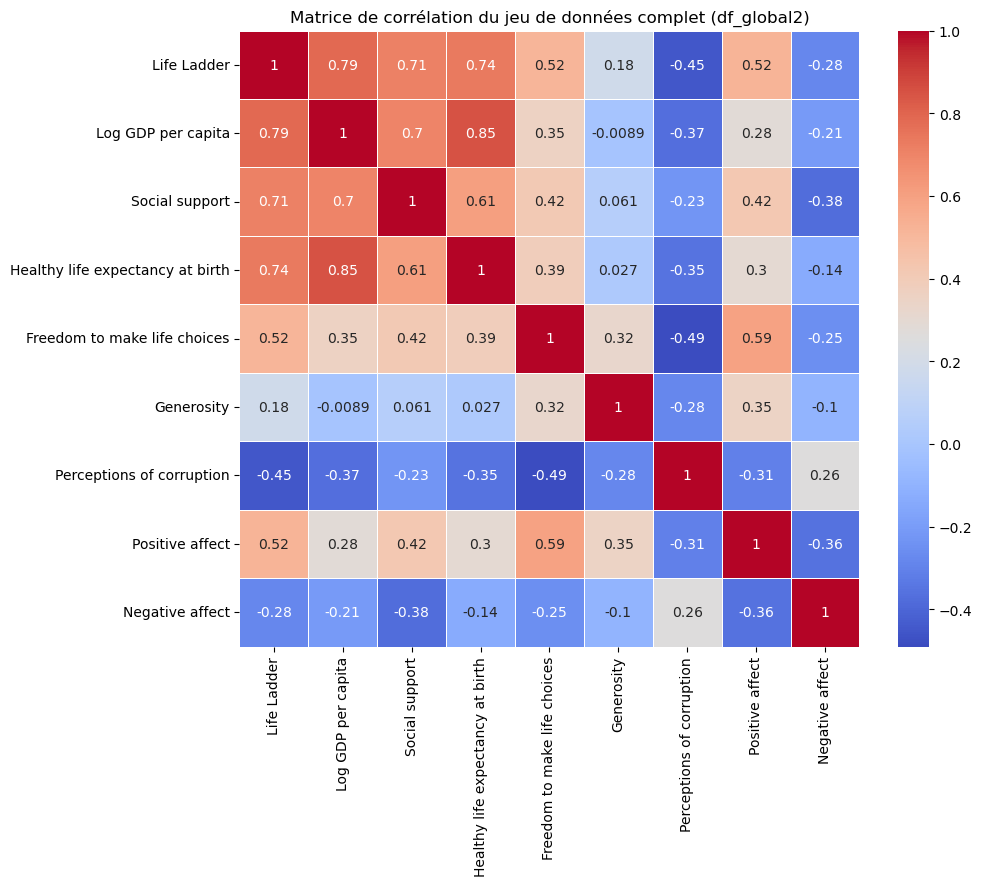

In [44]:
# Calcul et affichage des corrélations pour df_global2 par une carte de chaleur (heatmap)
correlation_matrix = df_global2[num_data_col].corr()
correlation_matrix

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title('Matrice de corrélation du jeu de données complet (df_global2)')
plt.show()

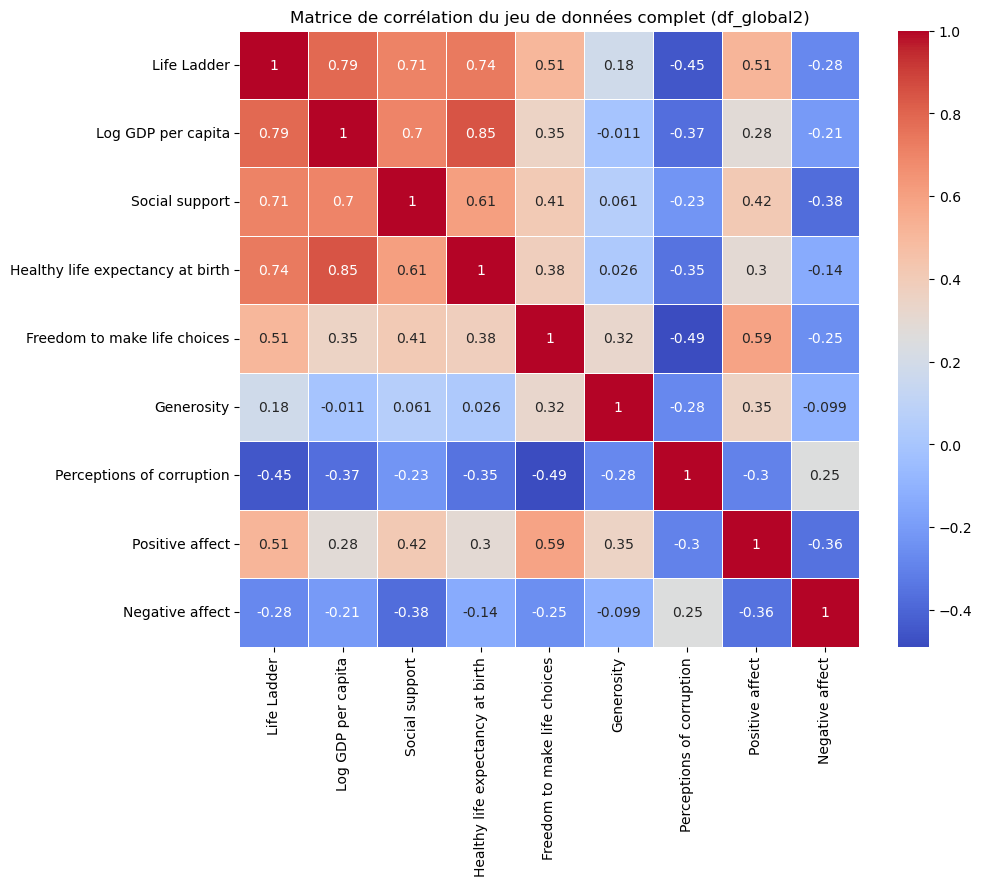

In [45]:
# Du fait de la suppression de l'année 2005 dans le jeu de données par année, on supprime également les données
# de cette années dans df_global2 afin de vérifier si cela a un impact important sur les corrélations.
df_global_3 = df_global2[df_global2['year'] != 2005]

correlation_matrix2 = df_global_3[num_data_col].corr()
correlation_matrix2

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2, annot=True, cmap="coolwarm", linewidths=.5)
plt.title('Matrice de corrélation du jeu de données complet (df_global2)')
plt.show()

In [46]:
# A priori, l'impact est minime.

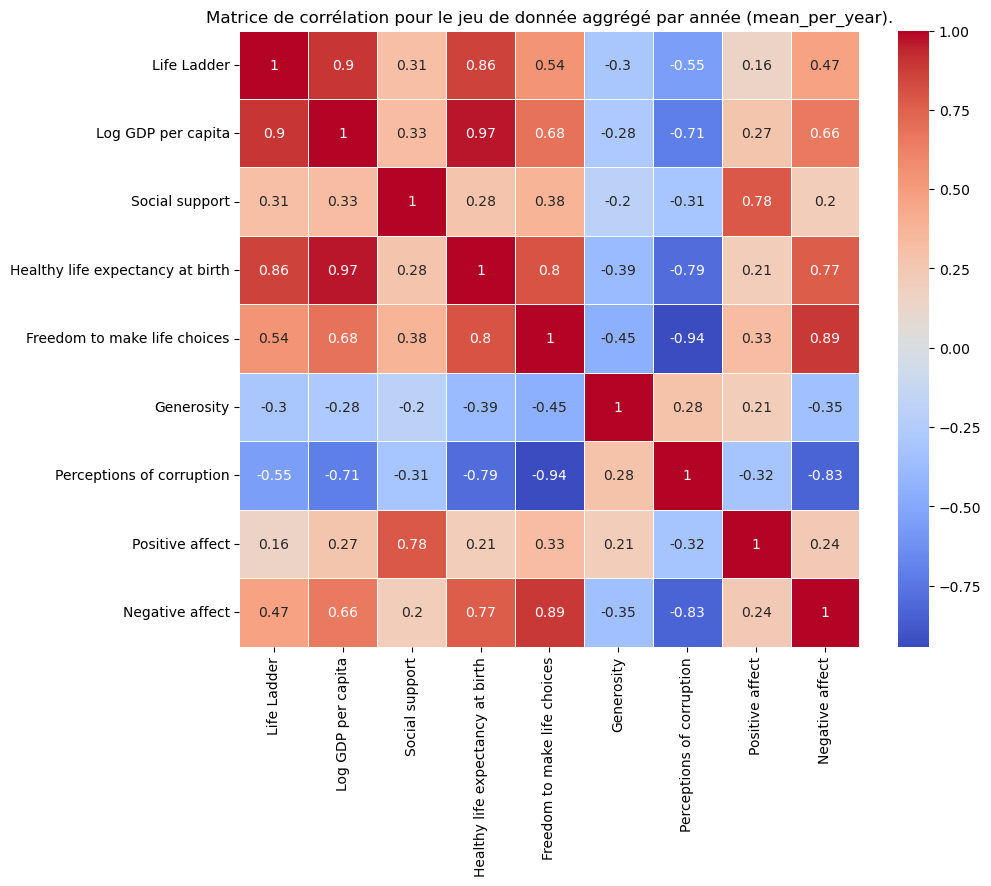

In [47]:
# Calcul et affichage des corrélations pour mean_per_year par une carte de chaleur (heatmap)
correlation_matrix_tot = mean_per_year[num_data_col].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_tot, annot=True, cmap="coolwarm", linewidths=.5)
plt.title('Matrice de corrélation pour le jeu de donnée aggrégé par année (mean_per_year).')
plt.show()

In [48]:
# On constate les corrélations semblent globalement identiques entre les deux jeux de données.
# Cependant, on constate également une opposition entre les corrélations pour la variable : "Negative affect".
# En effet, les corrélations observées pour cette variable dans le second graphiques semblent contrintuitives.
# C'est d'autant plus marqué que l'on observe pas la même chose avec le premier jeu de données.
# Plus précisément, on voit les points suivants dans le deuxième graphique :
# -Log GDP per capita et Negative affect : 0.67
# -Healthy life exceptancy at birth et Negative affect : 0.76
# -Freedom to make life choices et Negative affect : 0.86
# -Perceptions of corruption : -0.76
# Cela indiquerait donc que l'amélioration de variables "objectives" comme le PIB et l'espérance de vie en bonne santé
# ne serait pas corrélée avec les sentiments négatifs mais plutôt qu'il y serait négativement corrélés.
# De même, cela laisserait penser que plus la corruption augmente, moins celle-ci semble peser sur le moral de 
# la population comme si les gens n'y la considéraient comme uen forme de normalité.
# Ce point mériterait une analyse plus poussée.

In [49]:
correlation_matrix


,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Life Ladder,1.000000,0.787955,0.711094,0.736232,0.515910,0.183814,-0.451341,0.518783,-0.280656
Log GDP per capita,0.787955,1.000000,0.701320,0.849240,0.354661,-0.008856,-0.371457,0.283633,-0.207804
Social support,0.711094,0.701320,1.000000,0.609514,0.416055,0.061340,-0.231838,0.421776,-0.376152
Healthy life expectancy at birth,0.736232,0.849240,0.609514,1.000000,0.386886,0.027128,-0.351178,0.298509,-0.138653
Freedom to make life choices,0.515910,0.354661,0.416055,0.386886,1.000000,0.320440,-0.489940,0.592802,-0.253811
Generosity,0.183814,-0.008856,0.061340,0.027128,0.320440,1.000000,-0.281504,0.351877,-0.099617
Perceptions of corruption,-0.451341,-0.371457,-0.231838,-0.351178,-0.489940,-0.281504,1.000000,-0.305454,0.256104
Positive affect,0.518783,0.283633,0.421776,0.298509,0.592802,0.351877,-0.305454,1.000000,-0.361101
Negative affect,-0.280656,-0.207804,-0.376152,-0.138653,-0.253811,-0.099617,0.256104,-0.361101,1.000000


In [50]:
# En dehors de la variable de négativité, on remarque les points suivants :

# Fortes corrélations positives:

# Healthy life expectancy & Log GDP per capita : Avec une corrélation de 0.969, cela suggère qu'il existe une 
# très forte relation positive entre l'espérance de vie en bonne santé à la naissance et le PIB par habitant.
# Les pays avec un PIB par habitant plus élevé ont généralement une espérance de vie en bonne santé plus longue. 
# Cela peut être dû à de meilleurs soins de santé, à une meilleure nutrition et à d'autres facteurs sociaux et 
# économiques dans les pays plus riches.

# Life Ladder & Log GDP per capita : Le coefficient de corrélation est de 0.866, ce qui indique une forte corrélation positive.
# Cela signifie que, en général, lorsque le PIB par habitant augmente, le Life Ladder tend également à augmenter. 
# C'est cohérent avec l'idée que des niveaux de revenu plus élevés sont souvent associés à un bien-être plus élevé.
# Cela reflète souvent une meilleure qualité de vie, une sécurité accrue, et d'autres avantages associés à une économie plus forte.

# Positive affect & Social support (0.746) : cette corrélation indique que lorsque les personnes ressentent un 
# soutien social plus élevé, elles ont également tendance à éprouver des affects positifs plus fréquemment. 
# Le soutien social peut inclure des relations familiales et amicales solides, des interactions sociales régulières, etc.

# Freedom to make life choices & Log GDP per capita : Une corrélation de 0.733 montre que la liberté de faire des 
# choix de vie tend à augmenter avec le PIB par habitant.
#Fortes corrélations négatives:

# Freedom to make life choices & Perceptions of corruption (-0.904) : Cette forte corrélation négative suggère que 
# dans les endroits où les perceptions de corruption sont élevées, la liberté de faire des choix de vie est généralement réduite.
# La corruption peut entraver la liberté individuelle et la confiance dans les institutions.

# Healthy life expectancy at birth & Perceptions of corruption (-0.831) : les pays avec des perceptions élevées de 
# corruption ont tendance à avoir une espérance de vie en bonne santé plus courte. 
# La corruption peut affecter la qualité des soins de santé, l'accès à des services médicaux de qualité, et 
# d'autres facteurs importants pour la santé.

# Log GDP per capita & Perceptions of corruption (-0.780) : une économie plus forte (mesurée par le PIB par 
# habitant) est généralement associée à des perceptions plus faibles de la corruption. Les pays avec un PIB par 
# habitant plus élevé peuvent avoir des institutions plus solides, une meilleure gouvernance et une réglementation
# plus stricte pour contrer la corruption.
# Si l'on exclut la perception de la corruption de l'analyse, les corrélations négatives principales sont les suivantes :

# Freedom to make life choices & Generosity (-0.524) : cette corrélation négative indique que lorsqu'il y a une 
# plus grande liberté de faire des choix de vie, la générosité tend à être plus faible. 
# C'est une observation intéressante et pourrait suggérer que dans les sociétés où les individus ont plus de 
# liberté personnelle, il pourrait y avoir moins d'incitatifs ou de pressions sociales pour des actes généreux. 
# Cependant, il est important de noter que la causalité n'est pas claire, et d'autres facteurs pourraient 
# influencer cette relation.

# Healthy life expectancy at birth & Generosity (-0.455) : les pays ayant une espérance de vie en bonne santé plus 
# longue semblent avoir des niveaux de générosité plus bas. 
# Cela pourrait être dû à divers facteurs socio-économiques, comme une plus grande sécurité économique réduisant 
# la nécessité de dons charitables, mais cela nécessite une investigation plus approfondie.

# Log GDP per capita & Generosity (-0.333) : il semble y avoir une corrélation négative modérée entre le PIB par 
# habitant et la générosité. Cela pourrait suggérer que les pays plus riches (en termes de PIB par habitant) sont moins généreux. 
# Cependant, cela pourrait aussi être dû à la manière dont la "générosité" est mesurée, car les dons charitables 
# dans les pays riches pourraient prendre des formes différentes ou être influencés par des facteurs fiscaux.

# Life Ladder & Generosity (-0.323) : cette corrélation suggère que le bien-être ou le bonheur (mesuré par Life Ladder)
# est légèrement négativement corrélé avec la générosité. 
# Cela pourrait signifier que dans les régions où les gens sont plus heureux ou satisfaits de leur vie, il y a 
# moins d'actes de générosité. 
# Encore une fois, cela pourrait être lié à la manière dont la générosité est mesurée ou à des facteurs culturels ou socio-économiques.
# En résumé, ces corrélations suggèrent que le PIB par habitant, l'espérance de vie en bonne santé, et la liberté 
# de faire des choix de vie sont étroitement liés et influencent positivement le bien-être des individus. 
# En revanche, la corruption semble avoir des effets négatifs sur ces mêmes facteurs.
# On cherche ensuite à étudier si les données du jeu df_global2 suivent ou non une distribution normale.

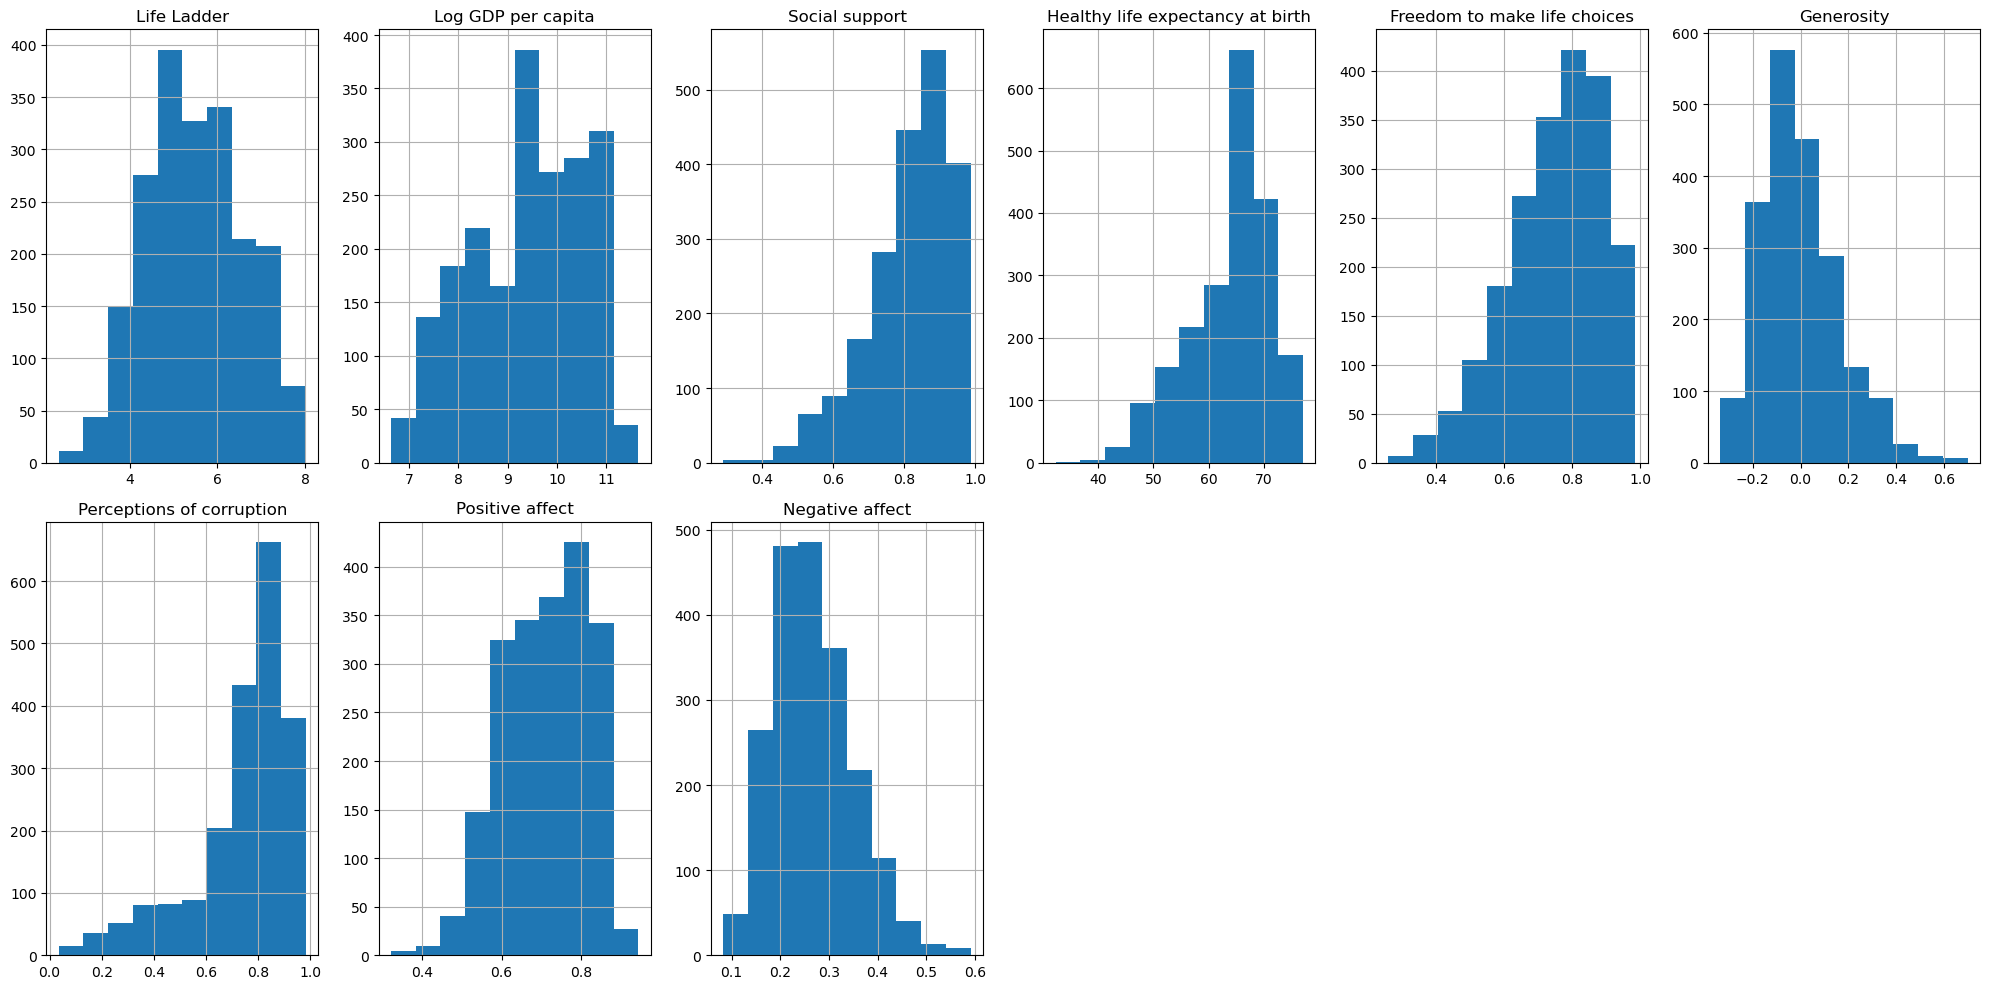

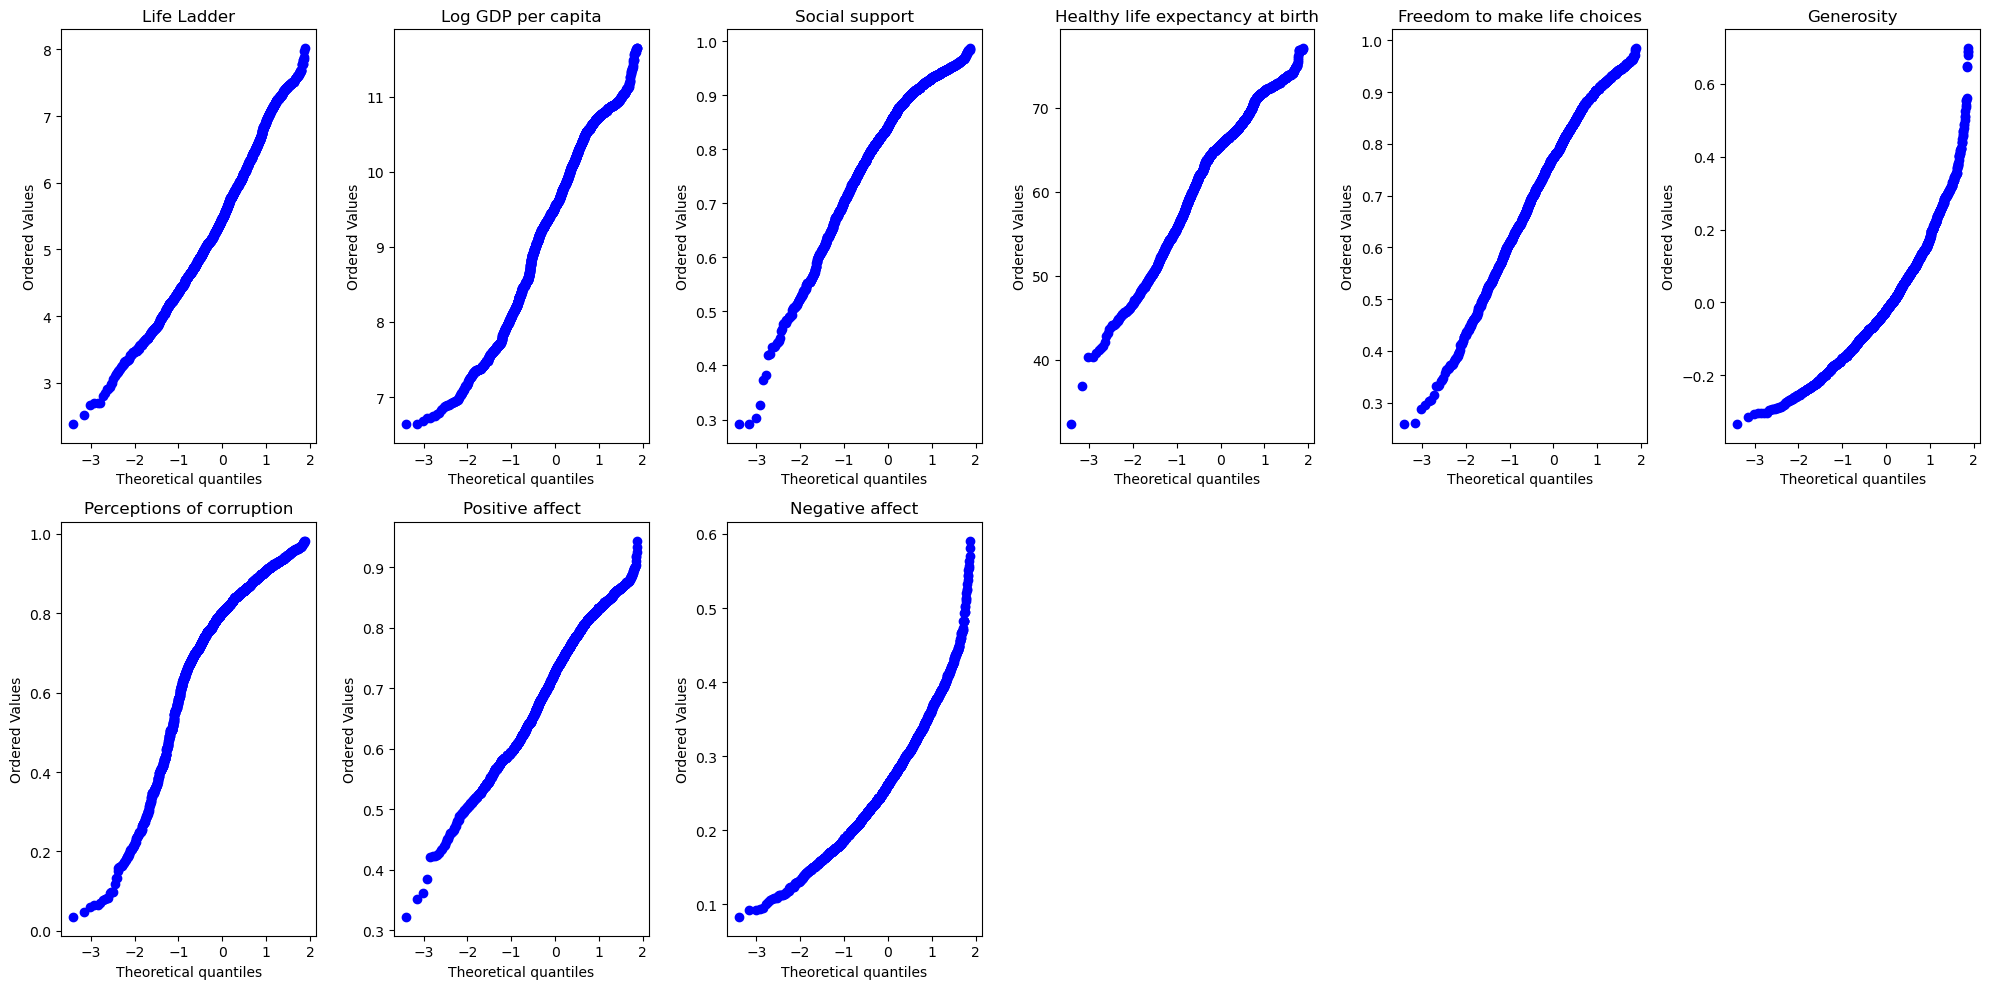

Test de Shapiro-Wilk pour Life Ladder:
Statistique = nan, p-valeur = 1.0
La variable Life Ladder suit une distribution normale.

Test de Shapiro-Wilk pour Log GDP per capita:
Statistique = nan, p-valeur = 1.0
La variable Log GDP per capita suit une distribution normale.

Test de Shapiro-Wilk pour Social support:
Statistique = nan, p-valeur = 1.0
La variable Social support suit une distribution normale.

Test de Shapiro-Wilk pour Healthy life expectancy at birth:
Statistique = nan, p-valeur = 1.0
La variable Healthy life expectancy at birth suit une distribution normale.

Test de Shapiro-Wilk pour Freedom to make life choices:
Statistique = nan, p-valeur = 1.0
La variable Freedom to make life choices suit une distribution normale.

Test de Shapiro-Wilk pour Generosity:
Statistique = nan, p-valeur = 1.0
La variable Generosity suit une distribution normale.

Test de Shapiro-Wilk pour Perceptions of corruption:
Statistique = nan, p-valeur = 1.0
La variable Perceptions of corruption suit un

In [51]:
# Création d'une figure pour les histogrammes
plt.figure(figsize=(20, 10))

# Pour chaque colonne dans vos données
for i, col in enumerate(df_global2[num_data_col].columns, 1):
    plt.subplot(2, len(df_global2.columns) // 2, i)
    df_global2[col].hist()
    plt.title(col)

plt.tight_layout()
plt.show()

# Affichage des Q-Q Plots
plt.figure(figsize=(20, 10))

for i, col in enumerate(df_global2[num_data_col].columns, 1):
    plt.subplot(2, len(df_global2.columns) // 2, i)
    stats.probplot(df_global2[col], plot=plt)
    plt.title(col)

plt.tight_layout()
plt.show()

# Test de Shapiro-Wilk pour la normalité
for col in df_global2[num_data_col].columns:
    shapiro_test = stats.shapiro(df_global2[col])
    print(f"Test de Shapiro-Wilk pour {col}:")
    print(f"Statistique = {shapiro_test.statistic}, p-valeur = {shapiro_test.pvalue}")
    if shapiro_test.pvalue < 0.05:
        print(f"La variable {col} ne suit pas une distribution normale.\n")
    else:
        print(f"La variable {col} suit une distribution normale.\n")

In [52]:
# On constate qu'aucune colonne ne correspond à une distribution normale.
# En effet, on le constate graphiquement par les histogrammes et les Q-Q plots.
# En outre, on réalise un test de Shapiro-Wilk pour le confirmer.
# Pour rappel, il test l'hypothèse nulle selon laquelle une variable est normalement distribuée. 
# Si la p-valeur est inférieure à un seuil de significativité (généralement 0,05), alors l'hypothèse nulle est rejetée et les données ne sont pas normalement distribuées.
# Ainsi, ces différents points nous conduisent à privilégier la normalisation à la standardisation.

In [53]:
# On va tester la même chose mais cette fois-ci sur les données regroupées par année

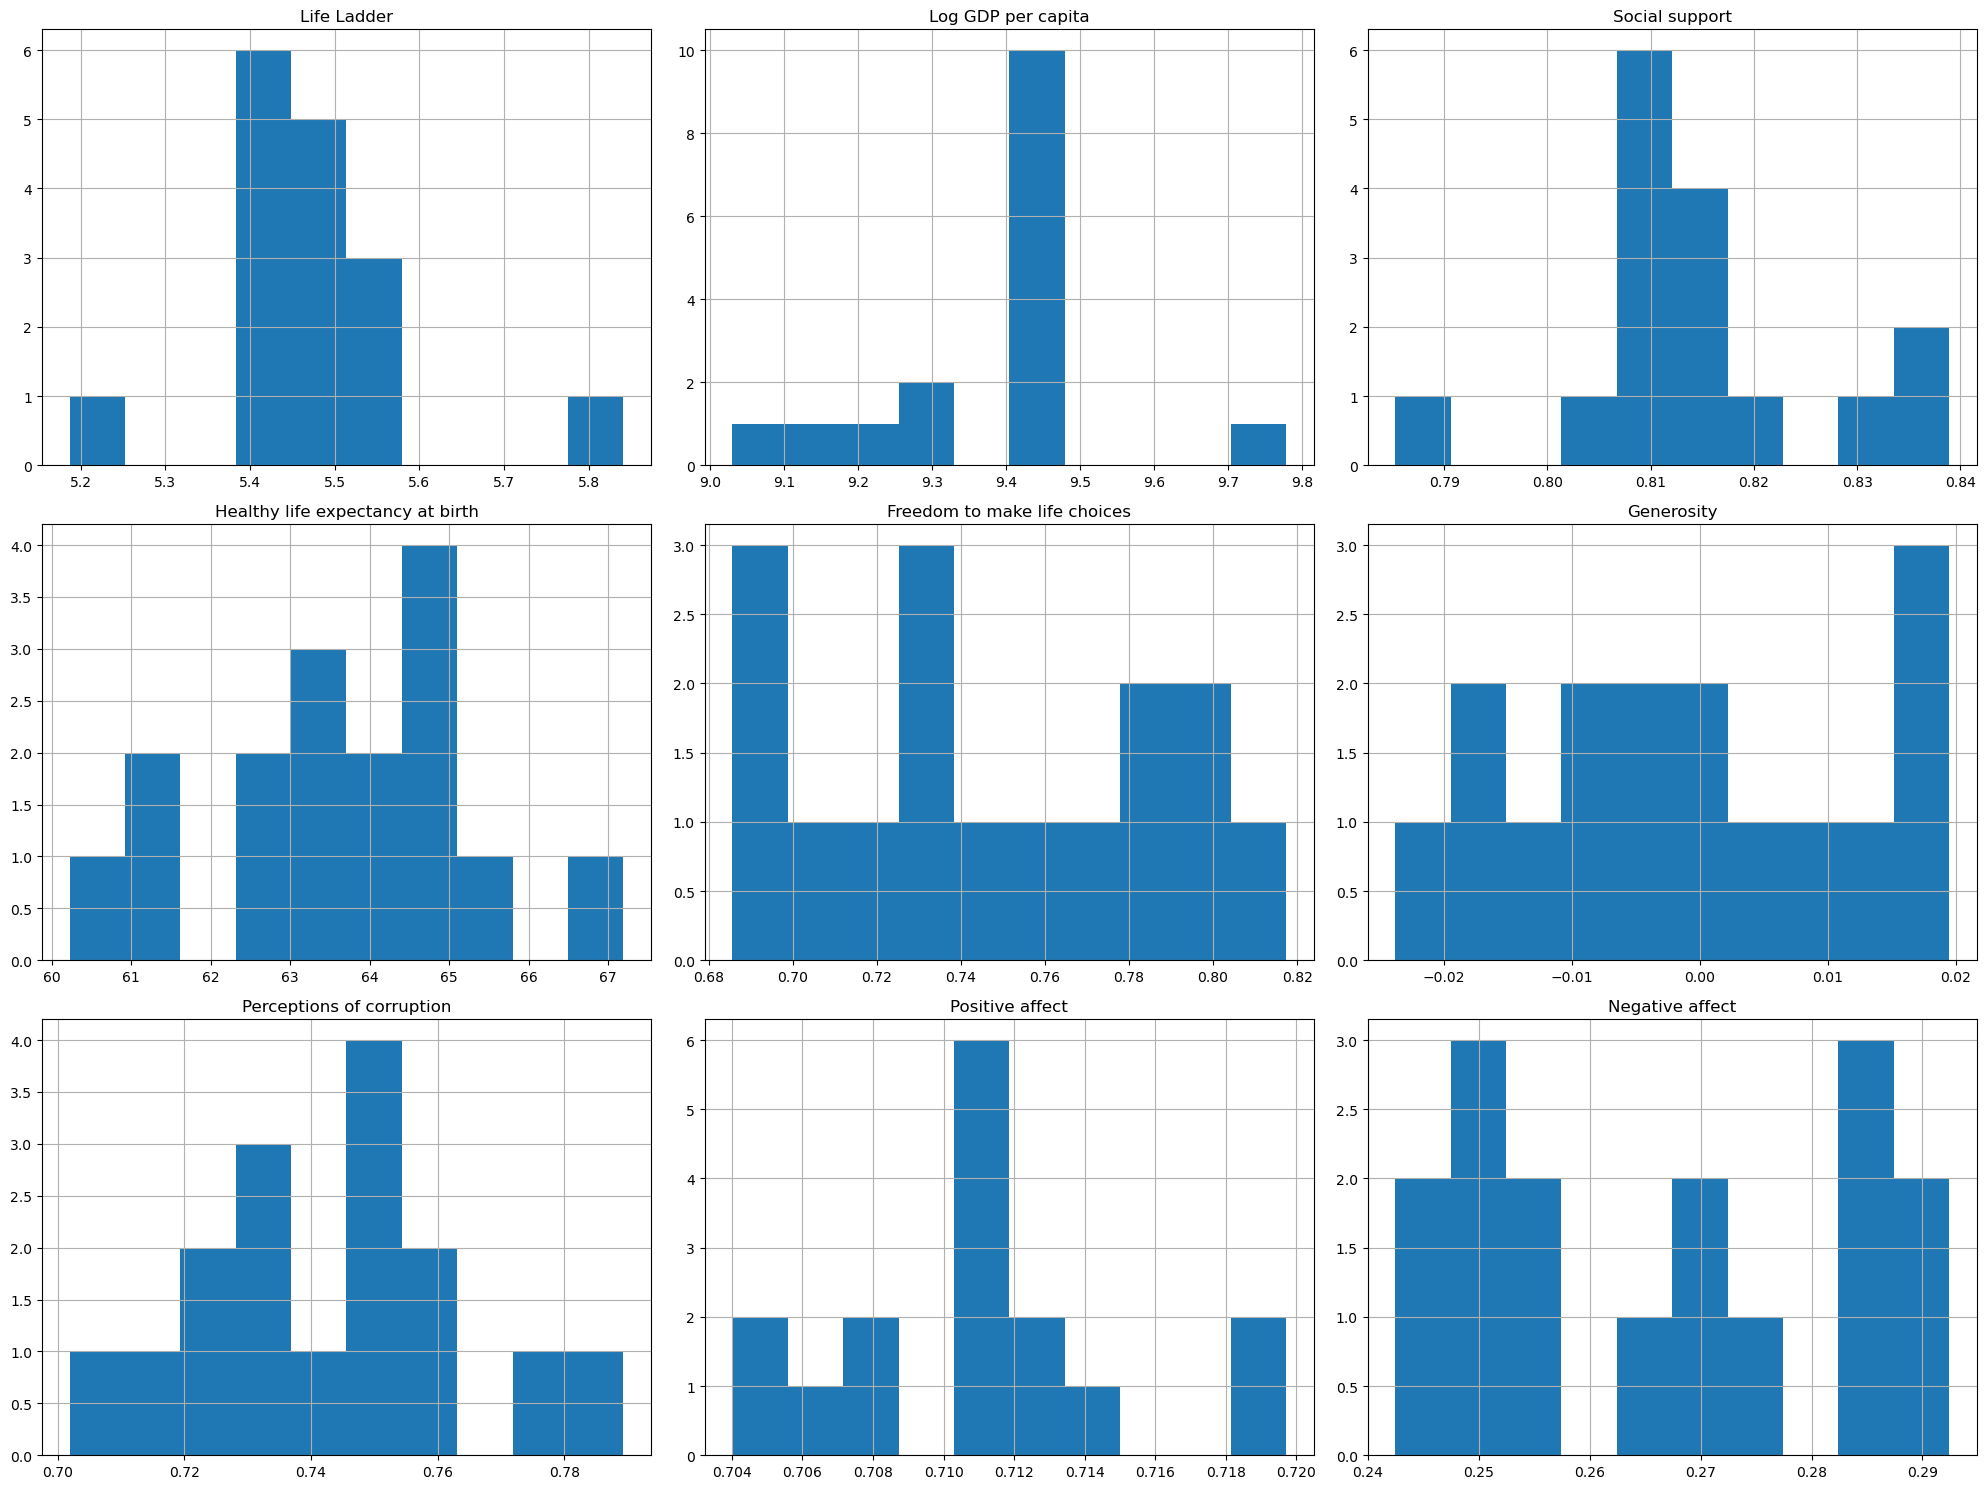

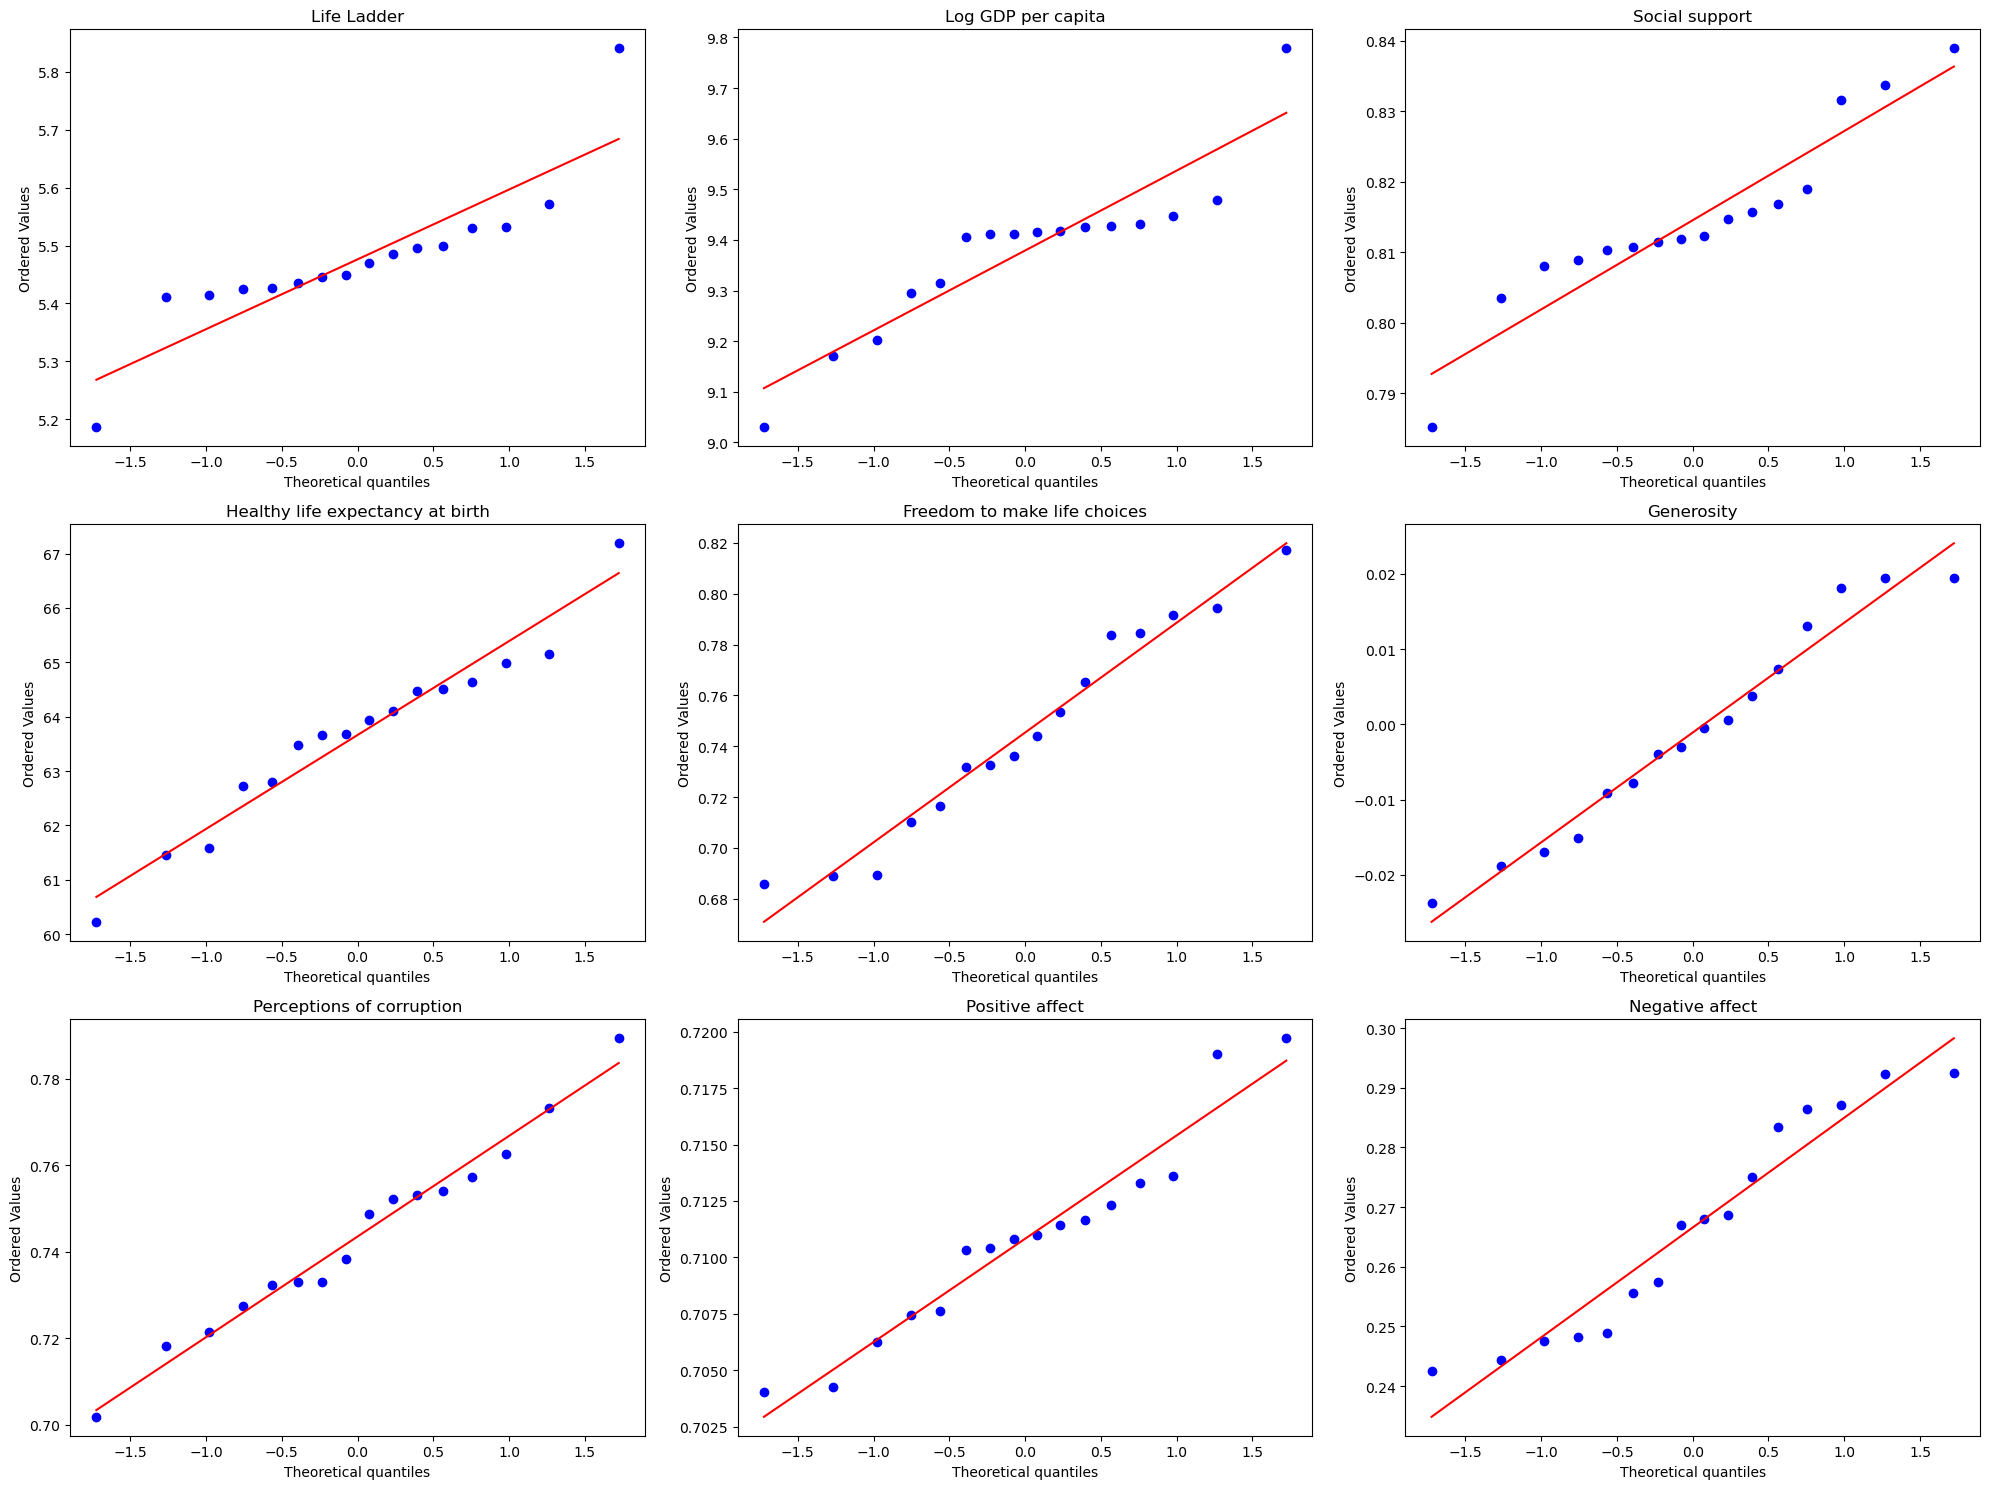

Test de Shapiro-Wilk pour Life Ladder:
Statistique = 0.8225064873695374, p-valeur = 0.005507599096745253
La variable Life Ladder ne suit pas une distribution normale.

Test de Shapiro-Wilk pour Log GDP per capita:
Statistique = 0.8718517422676086, p-valeur = 0.029032062739133835
La variable Log GDP per capita ne suit pas une distribution normale.

Test de Shapiro-Wilk pour Social support:
Statistique = 0.9098694324493408, p-valeur = 0.11580806970596313
La variable Social support suit une distribution normale.

Test de Shapiro-Wilk pour Healthy life expectancy at birth:
Statistique = 0.9655256867408752, p-valeur = 0.7619649767875671
La variable Healthy life expectancy at birth suit une distribution normale.

Test de Shapiro-Wilk pour Freedom to make life choices:
Statistique = 0.950710117816925, p-valeur = 0.5010201930999756
La variable Freedom to make life choices suit une distribution normale.

Test de Shapiro-Wilk pour Generosity:
Statistique = 0.9517371654510498, p-valeur = 0.517699

In [54]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Affichage des histogrammes
plt.figure(figsize=(20, 15))
for i, col in enumerate(mean_per_year.columns, 1):
    plt.subplot(3, 3, i)  # Grid 3x3
    mean_per_year[col].hist()
    plt.title(col)
plt.tight_layout()
plt.show()

# Affichage des Q-Q Plots
plt.figure(figsize=(20, 15))
for i, col in enumerate(mean_per_year.columns, 1):
    plt.subplot(3, 3, i)  # Grid 3x3
    stats.probplot(mean_per_year[col], plot=plt)
    plt.title(col)
plt.tight_layout()
plt.show()

# Test de Shapiro-Wilk pour la normalité
for col in mean_per_year.columns:
    shapiro_test = stats.shapiro(mean_per_year[col])
    print(f"Test de Shapiro-Wilk pour {col}:")
    print(f"Statistique = {shapiro_test.statistic}, p-valeur = {shapiro_test.pvalue}")
    if shapiro_test.pvalue < 0.05:
        print(f"La variable {col} ne suit pas une distribution normale.\n")
    else:
        print(f"La variable {col} suit une distribution normale.\n")

In [55]:
# On constate que cette fois-ci, certaines variables suivent une loi normale et d'autres non.
# On va donc procéder successivement à une normalisation puis à une standardisation.
# Cela nous permettra d'analyse le jeu de données sous deux angles différents.

In [56]:
from sklearn.preprocessing import MinMaxScaler

# Création de l'instance du scaler
scaler = MinMaxScaler()

# Appliquer le scaler à vos données
data_normalized = scaler.fit_transform(mean_per_year)


In [57]:
df_normalized = pd.DataFrame(data_normalized, columns=mean_per_year.columns, index=mean_per_year.index)


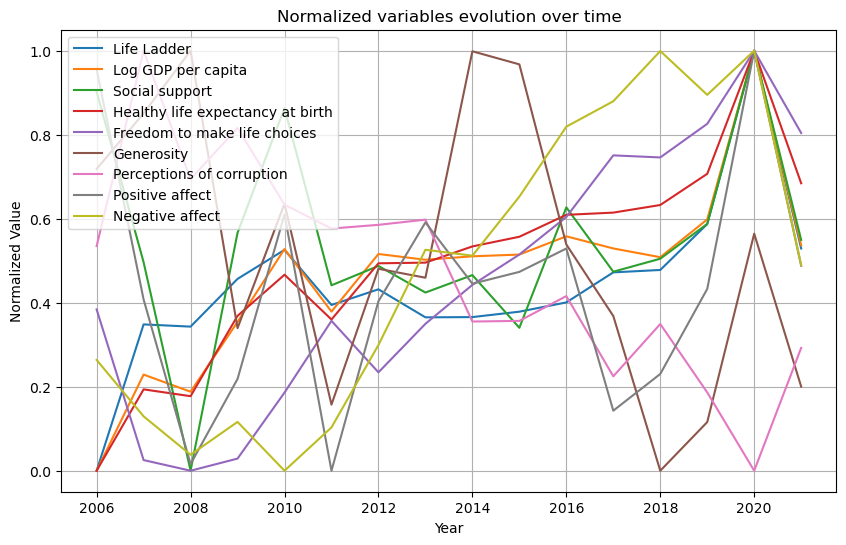

In [58]:
plt.figure(figsize=(10, 6))

for column in df_normalized.columns:
    plt.plot(mean_per_year.index, df_normalized[column], label=column)

plt.legend()
plt.xlabel('Year')
plt.ylabel('Normalized Value')
plt.title('Normalized variables evolution over time')
plt.grid(True)
plt.show()

In [59]:
# Voici quelques observations que l'on peut tirer de ce graphique :
# Life Ladder : il semble y avoir une tendance générale à la hausse du Life Ladder au fil des ans, avec quelques 
# baisses intermédiaires. La valeur atteint son maximum en 2020.
# Cela indique donc que la perception de la qualité de vie a suivi une tendance haussière depuis 2006.

# Log GDP per capita : cette variable montre également une tendance à la hausse, culminant en 2020. 
# Il y a une forte corrélation entre le PIB par habitant et le Life Ladder, ce qui est cohérent avec l'idée que 
# les pays avec des revenus plus élevés ont généralement un plus grand bien-être.

# Social support : après un pic en 2006, le soutien social a diminué jusqu'en 2008, puis a fluctué au fil des ans, 
# atteignant un autre pic en 2020.

# Healthy life expectancy at birth : cette variable montre une tendance claire à la hausse, suggérant que 
# l'espérance de vie en bonne santé s'améliore au fil du temps.

# Freedom to make life choices : il y a une tendance générale à la hausse avec quelques fluctuations.

# Generosity : Cette variable a connu des fluctuations significatives au fil des ans.  Elle atteint sa valeur la 
# plus basse en 2018.

# Perceptions of corruption : après avoir atteint un pic en 2007, les perceptions de la corruption ont généralement
# diminué, atteignant leur point le plus bas en 2020.

# Positive affect : il y a eu des fluctuations au fil des ans, avec un pic notable en 2020.

# Negative affect : Cette variable montre une tendance générale à la hausse, atteignant son maximum en 2020.
# Voici des réflexions globales réalisées à partir des points précédents :

# Les années récentes, en particulier 2020, semblent avoir des valeurs maximales pour plusieurs variables, 
# notamment Life Ladder, Log GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices,
# et Positive affect. 
# On peut supposer que la diminution globale constatée en 2021 est due à la pandémie de COVID-19 et les confinements.
# On a pu par exemple constater à cette occasion une envolée des démissions ou "big quit" (https://fr.wikipedia.org/wiki/Grande_D%C3%A9mission).
# Cependant, il serait intéressant de mener une études sur la période 2022 - 2023 pour vérifier la tendance.

# Concernant la perception de la corruption, on constate une tendance globale à la baisse entre 2006 (apogée) et 2020 (étiage)
# Étant donné ce qui a été constaté concernant les corrélations, cette baisse s'explique en grande partie par l'amélioration des 
# variables qui lui sont fortement négativement corrélées : la liberté de choix, l'espérance de vie en bonne santé et le PIB.
# En outre, on s'aperçoit que les période où elle est le plus forte sont des période de crise : 2008 (crise des 
# Subprime) et 2020 (COVID).

# On constate une hausse progressive de la négativité sur toute la période. La positivité augmente également mais de manière moins directe.
# Comme vu précédemment, il n'y a pas de corrélation forte entre ces deux variables. Toutefois, nous n'avons pas trouvé
# de point permettant d'expliquer cette tendance.

# Enfin, on constate que la générosité est la variable qui affiche la plus grande variation sur la période bien que tendentiellement en baisse entre 2006 et 2020.
# Apparaissant comme corrélée négativement à la majorité des autres variables, il serait intéressant de comprendre
# quelles sont les éléments qui l'influencent le plus.
# On pourrait émettre l'hypothèse que les crises comme celle de 2008 impactent fortement les budgets alloués aux dons
# aux associations par exemple. Ainsi, les gens auraient moins tendance à donner alors.

In [60]:
from sklearn.preprocessing import StandardScaler

# Création de l'instance du scaler
scaler = StandardScaler()

# Appliquer le scaler à vos données
data_standardized = scaler.fit_transform(mean_per_year)

In [61]:
data_standardized = pd.DataFrame(data_standardized, columns=mean_per_year.columns, index=mean_per_year.index)
data_standardized

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,,,,,,,,,
2006,-2.317010,-2.219439,1.567706,-2.129488,-0.228234,0.622229,0.239366,1.904609,-0.631744
2007,-0.492150,-1.128883,-0.216406,-1.293524,-1.409771,1.047113,2.139807,-0.096108,-1.019117
2008,-0.519862,-1.323114,-2.398487,-1.363549,-1.493331,1.525758,0.890591,-1.527866,-1.282914
2009,0.075428,-0.531175,0.091098,-0.538145,-1.398216,-0.594772,1.388462,-0.787195,-1.057345
2010,0.437199,0.295857,1.397952,-0.115419,-0.880494,0.356543,0.642748,0.643706,-1.392653
2011,-0.249921,-0.414231,-0.458102,-0.575755,-0.317761,-1.179490,0.410177,-1.585341,-1.095062
2012,-0.054484,0.239542,-0.255462,0.001818,-0.721585,-0.141124,0.446283,-0.111465,-0.528980
2013,-0.404150,0.173960,-0.533942,0.008610,-0.341205,-0.209405,0.496626,0.574412,0.125100
2014,-0.400977,0.213084,-0.351191,0.175319,-0.035810,1.521387,-0.494145,0.041072,0.084506


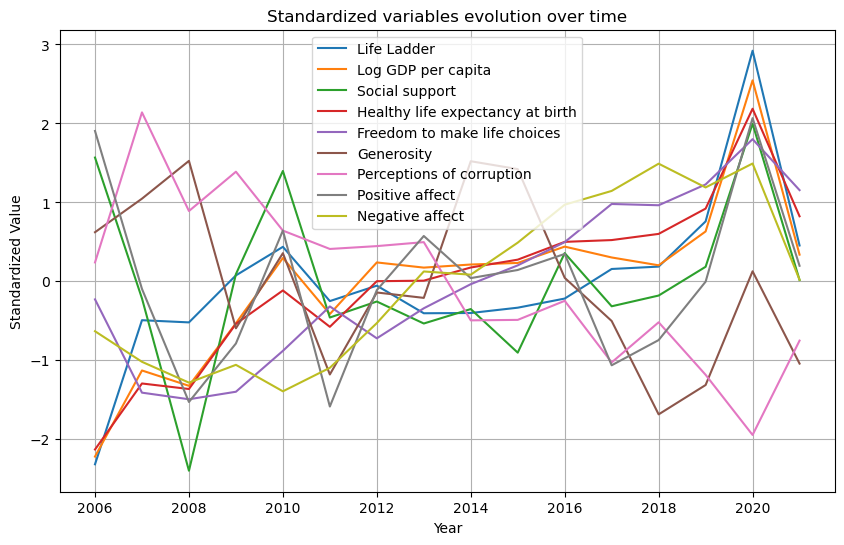

In [62]:
plt.figure(figsize=(10, 6))

for column in data_standardized.columns:
    plt.plot(mean_per_year.index, data_standardized[column], label=column)

plt.legend()
plt.xlabel('Year')
plt.ylabel('Standardized Value')
plt.title('Standardized variables evolution over time')
plt.grid(True)
plt.show()

In [63]:
# Le traitement des données par standardisation ne laisse pas apparaître de différence majeure par rapport à la 
# normalisation.







In [64]:
## Modélisation / prédiction du score de la life ladder ##

# Une des questions majeures à laquelle nous souhaitons répondre est : " Pouvons-prédire le score de life ladder?" 

# Pour y parvenir nous allons procéder à un type d'intelligence artificiel appelé Machine Learning.
# Cette spécialité de l'intelligence artificielle a pour objectif d'analyser et d'interpréter des modèles et 
# des structures de données afin de permettre l'apprentissage, le raisonnement et la prise de décision 
# sans interaction humaine.
# Dans ce projet, on va donc chercher à faire référence à l'entraînement d'un algorithme sur une partie des 
# données (variables explicatives) dans l' objectif d'utiliser ce modèle pour réaliser des prédictions (variable cible)
# sur de nouvelles données, inconnues par le modèle . 

# Mais avant de nous lancer dans la projection. Choisissons le modèle plus adapté.



In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [66]:
# Nous procédons à la séparation des variables explicatives dans feats et de la variable cible target:

feats = df_global2.drop(["Life Ladder"], axis = 1)
target = df_global2["Life Ladder"]

In [67]:
# retrait de colonne nom pays:

feats = feats.drop(['Country name'], axis = 1)

# vérification: 
feats.head()

,Regional indicator,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,South Asia,2008,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,South Asia,2009,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,South Asia,2010,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,South Asia,2011,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,South Asia,2012,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [77]:
# séparation du jeu
X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size = 0.25, random_state = 42)

In [78]:
# vérification de la répartition
print('Longueur de X_train :', X_train.shape)
print('Longueur de y_train :', y_train.shape)
print('Longueur de X_test:',X_test.shape)
print('Longueur de y_test :',y_test.shape)

Longueur de X_train : (1573, 10)
Longueur de y_train : (1573,)
Longueur de X_test: (525, 10)
Longueur de y_test : (525,)


In [79]:
# on 
num=["year","Log GDP per capita", "Social support","Healthy life expectancy at birth","Freedom to make life choices",
     "Generosity", "Perceptions of corruption","Positive affect", "Negative affect"]
cat=["Regional indicator"]


#Colonnes numériques
num_train = X_train.drop(cat,axis=1)
num_test = X_test.drop(cat,axis=1)

#Colonnes catégorielles
cat_train = X_train.drop(num,axis=1)
cat_test = X_test.drop(num,axis=1)

cat_train_new= pd.get_dummies(cat_train, columns = ["Regional indicator"],dtype=float)
cat_test_new= pd.get_dummies(cat_test, columns = ["Regional indicator"], dtype=float)


In [80]:
X_train_concat = pd.concat([num_train, cat_train_new], axis=1)
X_test_concat = pd.concat([num_test, cat_test_new], axis=1)


print("Dimensions de X_train_concat  :", X_train_concat.shape)
print("Dimensions de X_test_concat :", X_test_concat.shape)

Dimensions de X_train_concat  : (1573, 19)
Dimensions de X_test_concat : (525, 19)


In [81]:
# vérification:
X_train_concat.head()

,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Regional indicator_Central and Eastern Europe,Regional indicator_Commonwealth of Independent States,Regional indicator_East Asia,Regional indicator_Latin America and Caribbean,Regional indicator_Middle East and North Africa,Regional indicator_North America and ANZ,Regional indicator_South Asia,Regional indicator_Southeast Asia,Regional indicator_Sub-Saharan Africa,Regional indicator_Western Europe
1649,2016,11.419,0.925,76.20,0.904,0.143,0.047,0.824,0.111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1699,2017,9.450,0.870,56.10,0.787,-0.129,0.865,0.785,0.268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1613,2007,9.532,0.844,65.60,0.453,-0.165,0.905,0.576,0.334,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
782,2016,10.904,0.985,73.00,0.952,0.281,0.719,0.874,0.158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1137,2012,10.005,0.841,65.92,0.848,0.017,0.847,0.867,0.177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [82]:
# vérification:
y_train.head()

1649    6.033
1699    4.514
1613    4.750
782     7.510
1137    5.914
Name: Life Ladder, dtype: float64

In [83]:
#ML-1/ on commence par le modèle  régression linéaire

#ML-1.1/ entrainement du modèle régression linéaire
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() # On instancie le modèle
regressor.fit(X_train_concat, y_train) # On entraîne le modèle 


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [75]:
# ML-1.2/ affichage de l'intercept ainsi que les coefficients de chaque variable estimée par le modèle:

coeffs=list(regressor.coef_)
coeffs.insert(0, regressor.intercept_)

feats2=list(X_train_concat.columns)
feats2.insert(0, 'intercept')

pd.DataFrame({'valeur estimée': coeffs}, index=feats2)

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [74]:
#L'intercept représente la valeur moyenne de la variable cible lorsque toutes les variables prédictives du modèle 
#sont égales à zéro.Donc si toutes les variables explicatives sont à zéro , le modèle prédira le prix 
#d'une une life ladder à 12,96 ce qui est bien supérieur à 10 le maximum de l'échelle.

# Pour la suite des coefficients, nous pouvons les interpréter de la manière suivante : 
#lorsque une variable augmente d'une unité, la life ladder évolue en suivant le coefficient. 
#Par exemple, si Social support augmente d'une unité, la life ladder en sera augmenté de 1,561367 unités 
#selon notre modèle. 
# Ce tableau nous renseignant sur le poids des variables dans le choix de la régression : on comprend ici que 
# Social Support, ayant la valeur estimée la plus importante,a la plus de poids dans ce modèle]]

In [75]:
# ML-1.3/ Affichage du score R2 :

print('Coefficient de détermination du modèle LinearRegression sur train:', regressor.score(X_train_concat, y_train))
print('Coefficient de détermination du modèle LinearRegression sur test:', regressor.score(X_test_concat, y_test))
# il n'y a pas de surapprentissage

Coefficient de détermination du modèle LinearRegression sur train: 0.7981195187883428
Coefficient de détermination du modèle LinearRegression sur test: 0.7693518479440953


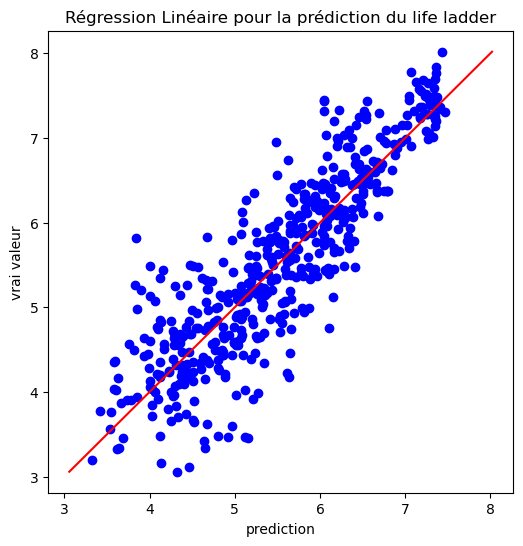

In [76]:
# ML-1.4/ Réalisation de la prédiction du modèle X_test et affichage du graphique de nuage de point et 
# de la droite d'équation y = x

import matplotlib.pyplot as plt

fig=plt.figure(figsize=(6,6)) # création de la figure 

pred_test=regressor.predict(X_test_concat) #on réalise la prédiction
plt.scatter(pred_test, y_test, c='blue')

plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), color='red')
plt.xlabel("prediction")
plt.ylabel("vrai valeur")
plt.title('Régression Linéaire pour la prédiction du life ladder')

plt.show()




In [77]:
# la majorité des points prédits sont concentrés autour de l'axe x=y
# Mais cela est surtout valable pour les valeurs de life ladder supérieur à 6,5  : elles sont donc bien prédites
# Les valeurs inférieures à 6.5 sont plus dispérsées : elles sont surévaluées et sous-évaluées

In [78]:
def score(y_test, pred_test) : 
    import numpy as np
    from sklearn.metrics import mean_absolute_error, mean_squared_error

    mae=mean_absolute_error(y_test, pred_test)
    mse=mean_squared_error(y_test, pred_test)
    rmse=np.sqrt(mse)

    return mae, mse, rmse

print(score(y_test,pred_test))

(0.39894435295283226, 0.2787638253120841, 0.527980894836247)


In [79]:
#La metrics MAE est de 0,399 traduisant ainsi que le modèle se trompe de 0,399 unités lorsqu'il prédit la variable
# life ladder. Poursuivons nos recherches pour trouver de meilleures performances.

In [80]:
# ML-2/ on procède maintenant au DecisionTreeRegressor

# ML-2.1/ entrainement du modèle DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor
regressor2=DecisionTreeRegressor(random_state=42) # On instancie le modèle
regressor2.fit(X_train_concat, y_train) # On entraîne le modèle 

DecisionTreeRegressor(random_state=42)

In [81]:
#On observe un réel overfitting

print('Coefficient de détermination du modèle  DecisionTreeRegressor sur train:', regressor2.score(X_train_concat,y_train))
print('Coefficient de détermination du modèle  DecisionTreeRegressor sur test:', regressor2.score(X_test_concat,y_test))



Coefficient de détermination du modèle  DecisionTreeRegressor sur train: 1.0
Coefficient de détermination du modèle  DecisionTreeRegressor sur test: 0.7637825100793759


In [82]:
# on note un meilleur score avec le modèle type DecisionTreeRegressor  mais avec un surapprentissage

In [83]:
# Pour pallier à l’overfitting, observé  nous pouvons intervenir sur 2 
# paramètres clefs : 
# - Max_depth qui spécifie la profondeur de l'arbre.
# - Min_sample_leaf qui va nous permet d'indiquer nombre minimal 
# d'individus requis pour une séparation de noeud. 


In [84]:
from sklearn.tree import DecisionTreeRegressor

model_min_samples = DecisionTreeRegressor(max_depth=3, min_samples_leaf=25, random_state=42)

model_min_samples.fit(X_train_concat, y_train)
print('Coefficient de détermination du modèle  DecisionTreeRegressor sur train samplé:', model_min_samples.score(X_train_concat, y_train))
print('Coefficient de détermination du modèle  DecisionTreeRegressor sur train samplé:', model_min_samples.score(X_test_concat, y_test))

Coefficient de détermination du modèle  DecisionTreeRegressor sur train samplé: 0.7663008120669581
Coefficient de détermination du modèle  DecisionTreeRegressor sur train samplé: 0.7142031176406849


In [85]:
#Bien que les performances globales et le score sur le jeu d'entraînement aient baissés,
#on constate que l'écart entre le score sur le jeu d'entraînement et le score sur le jeu 
# de test est réduit. On poursuit pour le moment avec ce modèle.

# ML-2.2/ Importance des variables :

#Cherchons à comprendre l’impact des variables dans la détermination de ce modèle en 
#affichant le graphique ci-dessous :


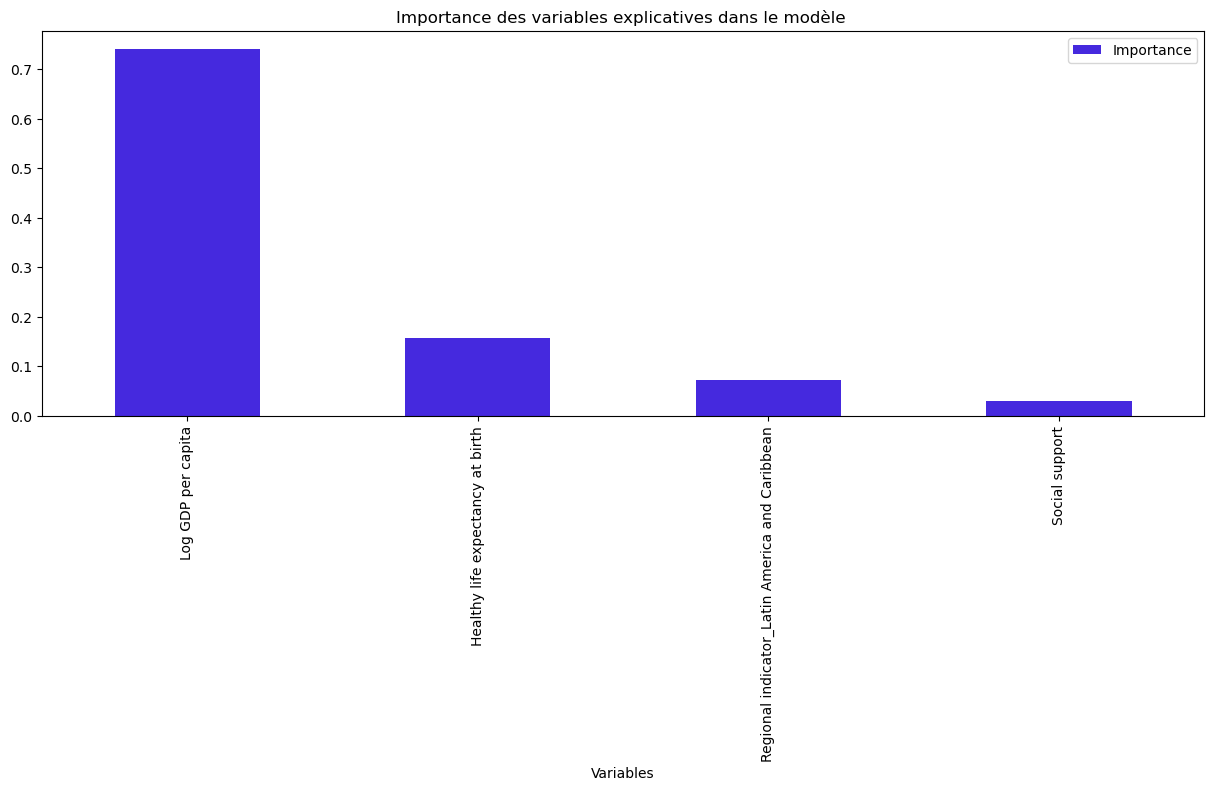

In [86]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


feat_importances=pd.DataFrame({
    "Variables":
    X_train_concat.columns,
    "Importance":
    model_min_samples.feature_importances_
}).sort_values(by='Importance', ascending=False)


feat_importances.nlargest(4, "Importance").plot.bar(x="Variables",
                                                    y="Importance",
                                                    figsize=(15, 5),
                                                    color="#4529de");
plt.title('Importance des variables explicatives dans le modèle ')
plt.show()

In [87]:
# ML-2.2/ Importance des variables : # Ligne de code à ne pas prendre en compte #

#import matplotlib.pyplot as plt

#feat_importances=pd.DataFrame
#(regressor2.feature_importances_, index=X_train_concat.columns, 
 #columns=["Importance"])

#feat_importances.sort_values(by='Importance', ascending=False, 
                             #inplace=True)

#feat_importances.plot(kind='bar', figsize=(8,6))

#plt.title('Importance des variables explicatives dans le modèle ')
#plt.show()

In [88]:
#Les variables les plus importantes pour l'algorithme sont Log GDP per
#capita, Healthy life expectancy at birth, Regional indicator Latin America and Caribean et Positive 
#affect.  On ne choisit pas Regional indicator Latin America and Caribean,
# comme il ne fait pas partie des index, il ne sera pas reconnu par la machine
#Ce sont ces critères qui vont le plus impacter le life ladder. 


In [92]:
# ML-2.3/ Réentrainement avec les 3 variables les plus importantes :

from sklearn.tree import DecisionTreeRegressor


X_train_reduced=X_train_concat[['Log GDP per capita','Healthy life expectancy at birth','Social support']].copy()
X_test_reduced=X_test_concat[['Log GDP per capita','Healthy life expectancy at birth','Social support']].copy()

regressor3=DecisionTreeRegressor(random_state=42) 
  
regressor3.fit(X_train_reduced, y_train)

print('Coefficient de détermination du modèle DecisionTreeRegressor sur train réduit:',regressor3.score(X_train_reduced,y_train))
print('Coefficient de détermination du modèle DecisionTreeRegressor sur test réduit:',regressor3.score(X_test_reduced,y_test))

Coefficient de détermination du modèle DecisionTreeRegressor sur train réduit: 1.0
Coefficient de détermination du modèle DecisionTreeRegressor sur test réduit: 0.6725356203226232


In [ ]:
# On observe que l'on perd de la performance de notre modèle en enlevant certaines données. 
# Essayons néanmoins avec un diagram tree avec cette  réduction


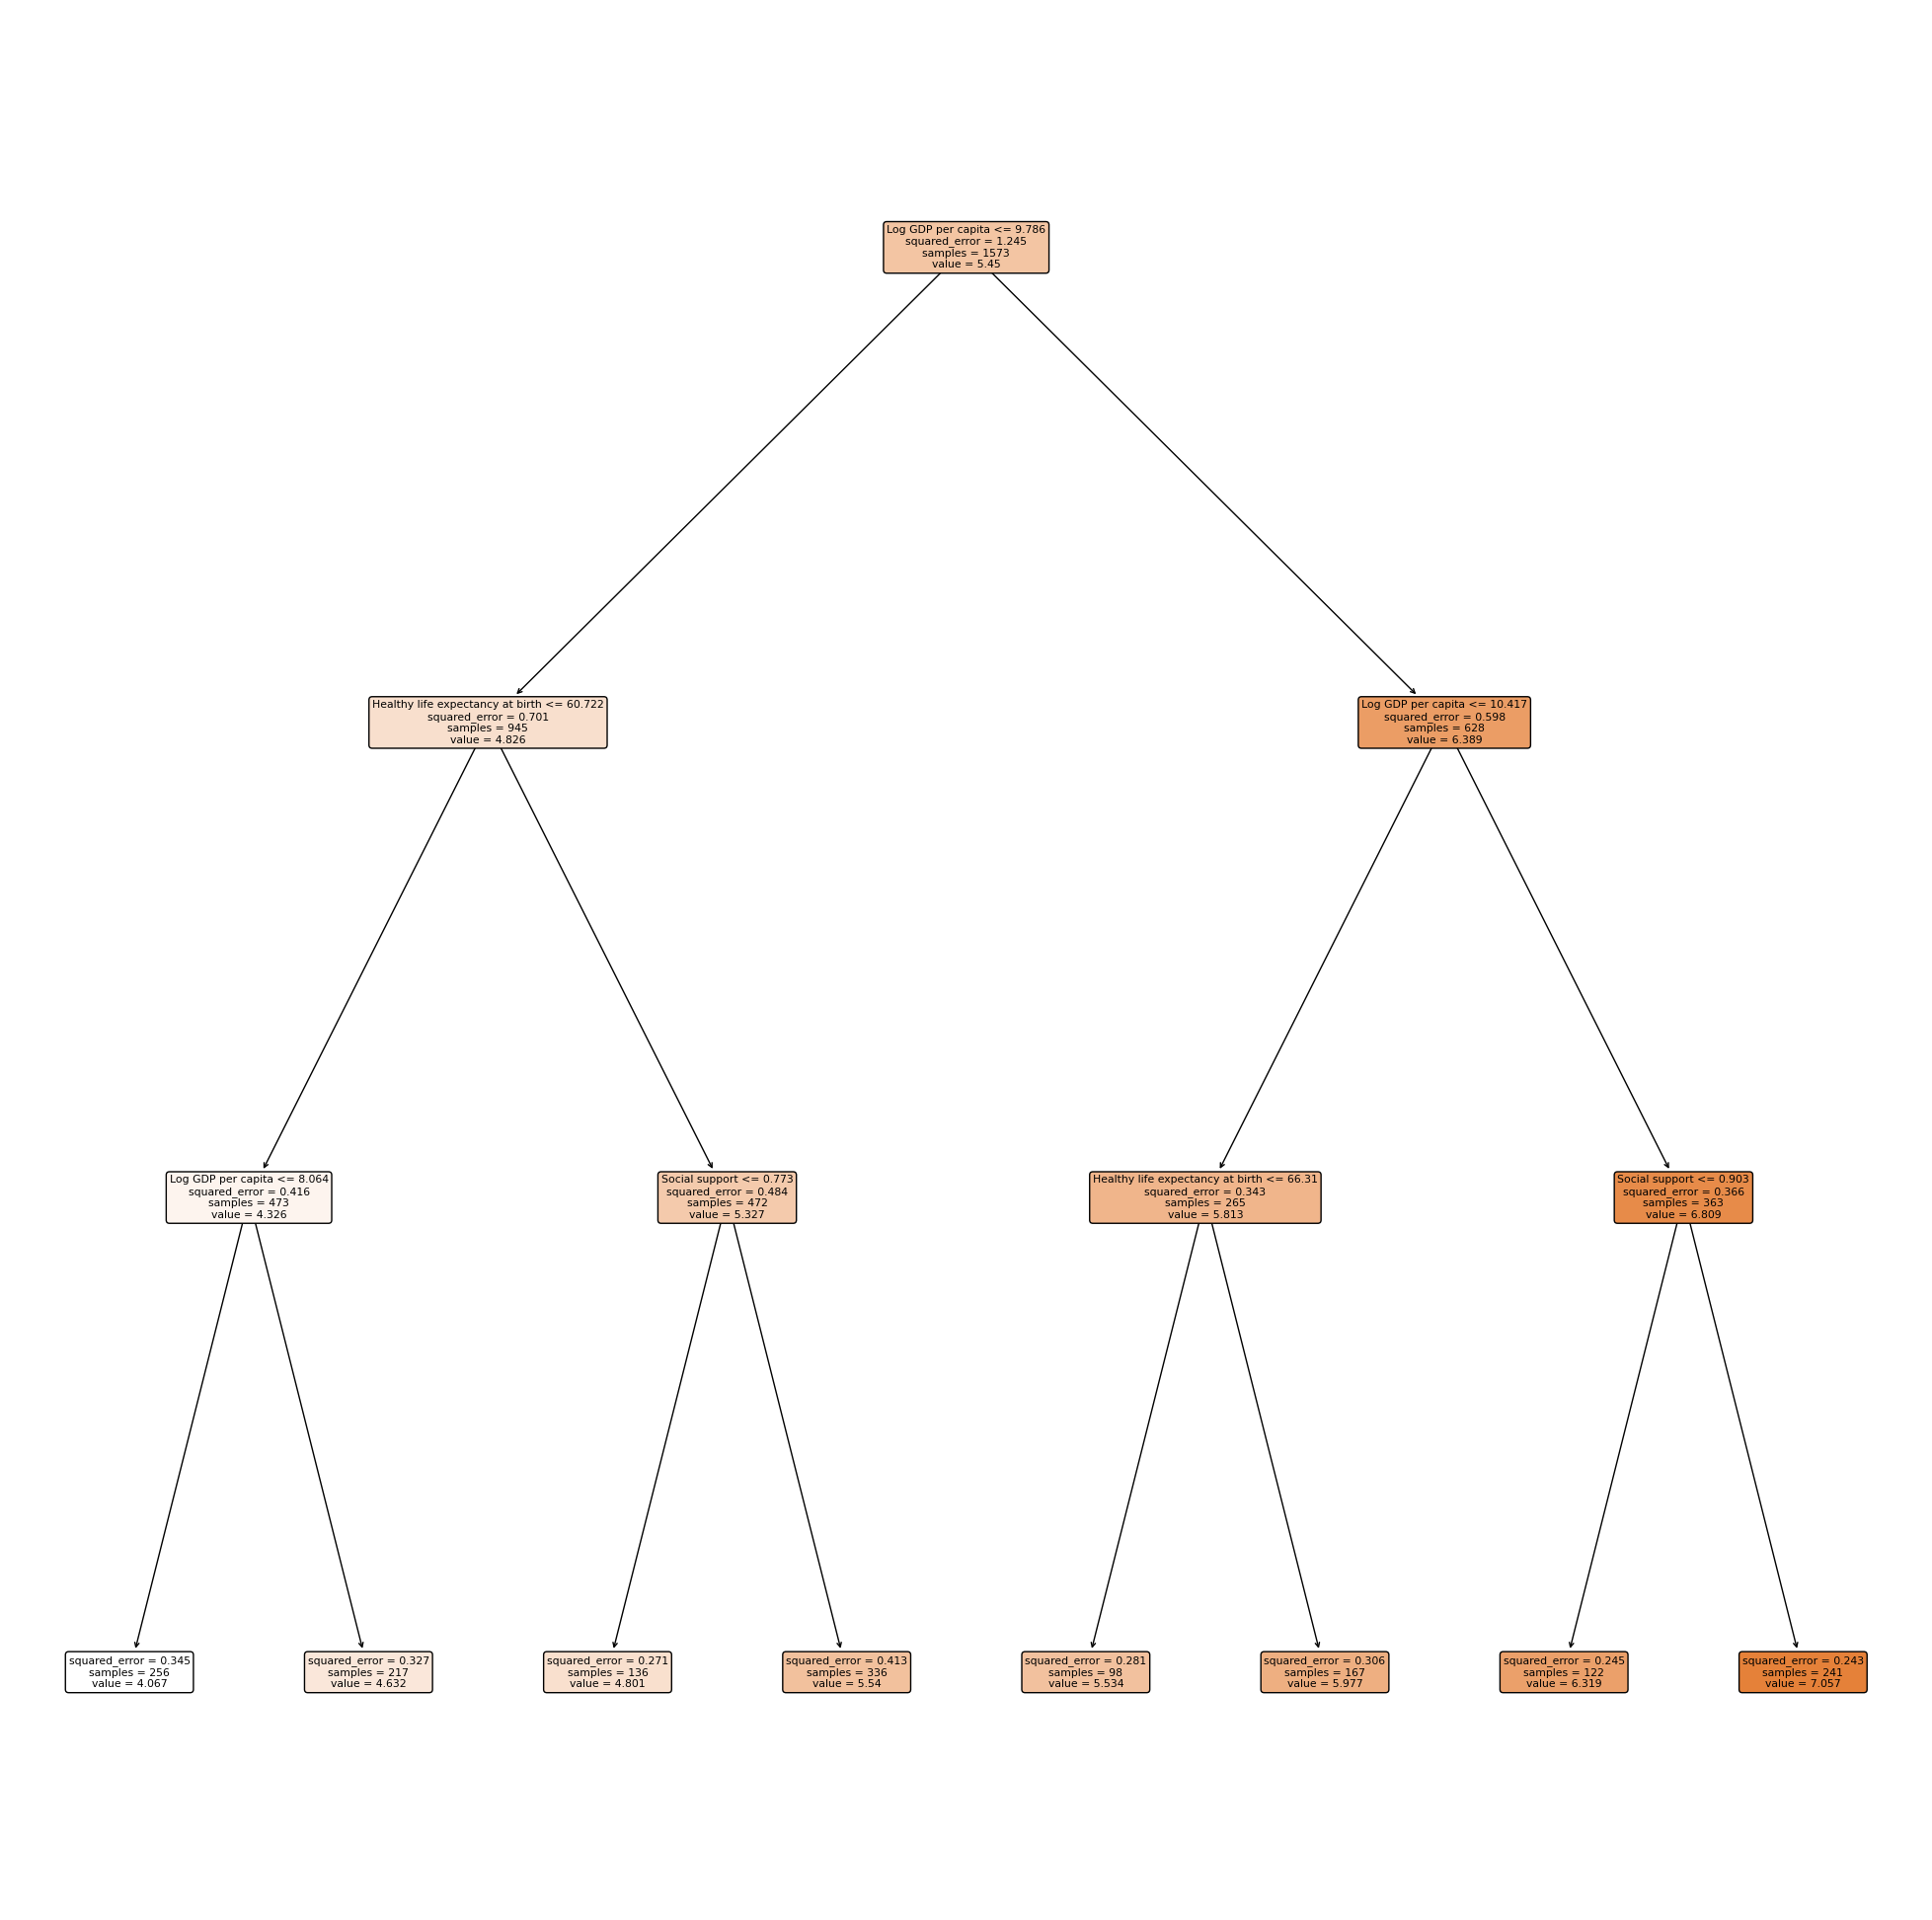

In [93]:
# Représentation graphique des derniers résultats

from sklearn.tree import plot_tree# tree diagram


regressor4 = DecisionTreeRegressor(random_state=42, max_depth=3) 
  
regressor4.fit(X_train_concat[['Log GDP per capita','Healthy life expectancy at birth','Social support']], y_train)

fig, ax=plt.subplots(figsize=(25, 25))  

plot_tree(regressor4, 
          feature_names=['Log GDP per capita','Healthy life expectancy at birth','Social support'], 
          filled=True, 
          rounded=True)

plt.show()





In [ ]:
# les feuilles les plus colorées sont les plus précises en terme de prédiction
# Bien que nous ayons des précisions sur la prédiction, on ne choisit pas 
# ce modèle à cause de la performance qu'il en ressort. 
#Passons au Random Forest Regressor.

In [95]:
#  ML-3/ on procède maintenant au RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

regressor5=RandomForestRegressor(random_state=42) 
  
regressor5.fit(X_train_concat, y_train)

print('Coefficient de détermination du modèle Random Forest sur train:',regressor5.score(X_train_concat,y_train))
print('Coefficient de détermination du modèle Random Forest sur train:',regressor5.score(X_test_concat,y_test))


Coefficient de détermination du modèle Random Forest sur train: 0.9847518989135391
Coefficient de détermination du modèle Random Forest sur train: 0.868715811890994


In [96]:
# Le modèle random forest est le plus performant  et présente lui aussi un overfitting

In [100]:
from sklearn.ensemble import RandomForestRegressor

model_min_samples2 = RandomForestRegressor(max_depth=3, min_samples_leaf=25, random_state=42)

model_min_samples2.fit(X_train_concat, y_train)
print('Coefficient de détermination du modèle Random Forest sur train samplé:', model_min_samples2.score(X_train_concat, y_train))
print('Coefficient de détermination du modèle Random Forest sur train samplé:', model_min_samples2.score(X_test_concat, y_test))

Coefficient de détermination du modèle Random Forest sur train samplé: 0.7931942495139016
Coefficient de détermination du modèle Random Forest sur train samplé: 0.7457386012066513


In [101]:
import sklearn.metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### DecisionTree

regressor_decision_tree=DecisionTreeRegressor(random_state=42) 
  
regressor_decision_tree.fit(X_train_concat, y_train)


y_pred_decision_tree=regressor_decision_tree.predict(X_test_concat)
y_pred_train_decision_tree=regressor_decision_tree.predict(X_train_concat)

# Calcul des métriques

# jeu d'entraînement 
mae_decision_tree_train=mean_absolute_error(y_train,y_pred_train_decision_tree)
mse_decision_tree_train=mean_squared_error(y_train,y_pred_train_decision_tree,squared=True)
rmse_decision_tree_train=mean_squared_error(y_train,y_pred_train_decision_tree,squared=False)

# jeu de test 
mae_decision_tree_test=mean_absolute_error(y_test,y_pred_decision_tree)
mse_decision_tree_test=mean_squared_error(y_test,y_pred_decision_tree,squared=True)
rmse_decision_tree_test=mean_squared_error(y_test,y_pred_decision_tree,squared=False)


### RandomForest

regressor_random_forest=RandomForestRegressor(random_state=42) 
  
regressor_random_forest.fit(X_train_concat, y_train)

# Calcul des métriques 
y_pred_random_forest=regressor_random_forest.predict(X_test_concat)
y_pred_random_forest_train=regressor_random_forest.predict(X_train_concat)


# jeu d'entraînement 
mae_random_forest_train=mean_absolute_error(y_train,y_pred_random_forest_train)
mse_random_forest_train=mean_squared_error(y_train,y_pred_random_forest_train,squared=True)
rmse_random_forest_train=mean_squared_error(y_train,y_pred_random_forest_train,squared=False)

# jeu de test 
mae_random_forest_test=mean_absolute_error(y_test,y_pred_random_forest)
mse_random_forest_test=mean_squared_error(y_test,y_pred_random_forest,squared=True)
rmse_random_forest_test=mean_squared_error(y_test,y_pred_random_forest,squared=False)


# Creation d'un dataframe pour comparer les metriques des deux algorithmes 
data={'MAE train': [mae_decision_tree_train, mae_random_forest_train],
        'MAE test': [mae_decision_tree_test, mae_random_forest_test],
        'MSE train': [mse_decision_tree_train,mse_random_forest_train],
        'MSE test': [mse_decision_tree_test,mse_random_forest_test],
        'RMSE train': [rmse_decision_tree_train, rmse_random_forest_train],
        'RMSE test': [rmse_decision_tree_test, rmse_random_forest_test]}
  
# Creer DataFrame
df=pd.DataFrame(data, index=['Decision Tree', 'Random Forest '])

df.head()

,MAE train,MAE test,MSE train,MSE test,RMSE train,RMSE test
Decision Tree,0.000000,0.381429,0.000000,0.285495,0.000000,0.534317
Random Forest,0.102271,0.304120,0.018988,0.158671,0.137797,0.398336


In [102]:
# En comparant les résultats entre les données de test et d'entraînement nous remarquons un réel écart : 
# Concernant le R2, l'arbre de décision et les forêts aléatoires ont généré de l'overfitting. 
# Le MSE est inexistant dans le cas du Decision Tree et faible pour le Random Forest. 
# En regardant la métrique la plus interprétable (MAE), nous pouvons conclure qu'en moyenne, le modèle  
# DecisionTree se trompe de 0,38 unités sur la prédiction de la life ladder et le modèle RandomForest de 
# 0,3 unités. Si on compare avec l'ordre de grandeur de notre variable cible, l'impact d'erreur n'est pas considérable.


In [103]:
#ML-5/ on teste un dernier modèle Super Vector Regression



In [113]:
from sklearn.svm import SVR
# create an SVR model with a linear kernel 
svr = SVR(kernel='linear') 
  
# train the model on the data 
svr.fit(X_train_concat, y_train)



SVR(kernel='linear')

In [114]:
print('Coefficient de détermination du modèle SVR sur train:',svr.score(X_train_concat,y_train))
print('Coefficient de détermination du modèle SVR sur train:',svr.score(X_test_concat,y_test))


Coefficient de détermination du modèle SVR sur train: 0.6030260248218524
Coefficient de détermination du modèle SVR sur train: 0.5657621514870368


In [ ]:
# les performances observées sont moins bonnes que les 2 autres modèles comparés précédemment 

In [ ]:
# A noter que j'ai tenté de réaliser un XGrad mais en régression, il nessite l'installation d'un logiciel 
# supplémentaire. J'ai donc abandonné l'idée.